# Extract data from wikipedia

In [50]:
import mwparserfromhell
import pandas as pd

# Wikipedia-Markup
wiki_markup = """
{{Main|2024 European Men's Handball Championship}}
This article displays the squads for the [[2024 European Men's Handball Championship]]. Each team consists of up to 20 players, of whom 16 may be fielded for each match.<ref>{{cite web|url=https://www.eurohandball.com/en/news/en/squad-lists-for-men-s-ehf-euro-2024-confirmed/|title=Squad lists for Men's EHF EURO 2024 confirmed|date=1 December 2023|work=eurohandball.com}}</ref>

''Age, club, caps and goals as of 10 January 2024.''

==Group A==
===France===
A 20-player squad was announced on 23 December 2023.<ref>{{cite web|url=https://www.ffhandball.fr/actualite/equipe-de-france/edfm-selection-rdf-nantes-1-6janvier-2024/|title=EdFM – 20 joueurs poursuivront la préparation|publisher=ffhandball.fr|date=23 December 2023|access-date=23 December 2023|language=fr}}</ref> The roster was reduced to 19 players on 6 January.<ref>{{cite web|url=https://www.ffhandball.fr/actualite/equipe-de-france/edfm-annonce-de-la-liste-06012024/|title=EdFM – 19 joueurs pour l'Allemagne|publisher=ffhandball.fr|date=6 January 2024|access-date=9 January 2024|language=fr}}</ref>

Head coach: [[Guillaume Gille]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/cZ6dxT8oT7nacBcKtGIZlSfYQw4xTylcFu7XwrO3BUM|title=Team roster: France|publisher=res.ehf.eu|date=10 January 2024|access-date=10 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Samir Bellahcene]]|age={{Birth date and age2|2024|1|10|1995|2|20|df=y}}|height=1.91 m|apps=4|goals=1|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=2|pos=RW|name=[[Yanis Lenne]]|age={{Birth date and age2|2024|1|10|1996|6|29|df=y}}|height=1.87 m|apps=47|goals=91|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs player|no=5|pos=CB|name=[[Nedim Remili]]|age={{Birth date and age2|2024|1|10|1995|7|18|df=y}}|height=1.95 m|apps=115|goals=352|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=8|pos=LB|name=[[Elohim Prandi]]|age={{Birth date and age2|2024|1|10|1998|8|24|df=y}}|height=1.93 m|apps=28|goals=63|club=[[Paris Saint-Germain Handball|Paris Saint-Germain]]|clubnat=FRA}}
{{Nat hs player|no=9|pos=RB|name=[[Melvyn Richardson]]|age={{Birth date and age2|2024|1|10|1997|1|31|df=y}}|height=1.90 m|apps=76|goals=183|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=10|pos=RB|name=[[Dika Mem]]|age={{Birth date and age2|2024|1|10|1997|8|31|df=y}}|height=1.94 m|apps=106|goals=340|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=11|pos=P|name=[[Nicolas Tournat]]|age={{Birth date and age2|2024|1|10|1994|4|5|df=y}}|height=2.00 m|apps=86|goals=190|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=13|pos=LB|name=[[Nikola Karabatić]]|age={{Birth date and age2|2024|1|10|1984|4|11|df=y}}|height=1.96 m|apps=348|goals=1277|club=[[Paris Saint-Germain Handball|Paris Saint-Germain]]|clubnat=FRA}}
{{Nat hs player|no=14|pos=CB|name=[[Kentin Mahé]]|age={{Birth date and age2|2024|1|10|1991|5|22|df=y}}|height=1.86 m|apps=162|goals=530|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=16|pos=GK|name=[[Charles Bolzinger]]|age={{Birth date and age2|2024|1|10|2000|12|14|df=y}}|height=1.98 m|apps=9|goals=1|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs player|no=17|pos=LB|name=[[Timothey N'Guessan]]|age={{Birth date and age2|2024|1|10|1992|9|18|df=y}}|height=1.95 m|apps=108|goals=216|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=22|pos=P|name=[[Luka Karabatic]]|age={{Birth date and age2|2024|1|10|1988|4|19|df=y}}|height=2.02 m|apps=144|goals=168|club=[[Paris Saint-Germain Handball|Paris Saint-Germain]]|clubnat=FRA}}
{{Nat hs player|no=23|pos=P|name=[[Ludovic Fabregas]]|age={{Birth date and age2|2024|1|10|1996|7|1|df=y}}|height=1.98 m|apps=129|goals=296|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=25|pos=LW|name=[[Hugo Descat]]|age={{Birth date and age2|2024|1|10|1992|8|16|df=y}}|height=1.83 m|apps=46|goals=200|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=28|pos=RW|name=[[Valentin Porte]]|age={{Birth date and age2|2024|1|10|1990|9|7|df=y}}|height=1.90 m|apps=182|goals=415|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs player|no=29|pos=RW|name=[[Benoît Kounkoud]]|age={{Birth date and age2|2024|1|10|1997|2|19|df=y}}|height=1.90 m|apps=39|goals=58|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=31|pos=LW|name=[[Dylan Nahi]]|age={{Birth date and age2|2024|1|10|1999|11|30|df=y}}|height=1.92 m|apps=45|goals=118|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=34|pos=P|name=[[Karl Konan]]|age={{Birth date and age2|2024|1|10|1995|6|3|df=y}}|height=1.96 m|apps=23|goals=5|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs player|no=92|pos=GK|name=[[Rémi Desbonnet]]|age={{Birth date and age2|2024|1|10|1992|2|28|df=y}}|height=1.82 m|apps=29|goals=2|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs end}}

===Germany===
A 19-player squad was announced on 21 December 2023.<ref>{{cite web|url=https://www.handball.net/news/mit-19-auf-kurs-ehf-euro-2024|title=Mit 19 auf Kurs EHF EURO 2024|publisher=handball.net|date=21 December 2023|access-date=21 December 2023|language=de}}</ref> [[Marian Michalczik]] had to withdrew due to an injury on 29 December.<ref>{{cite web|url=https://www.handball.net/news/ehf-euro-2024-dhb-nationalmannschaft-medientermin-michalczik|title=Trainingsverletzung: Marian Michalczik verpasst EHF EURO|publisher=handball.net|date=29 December 2023|access-date=29 December 2023|language=de}}</ref> On 6 January 2024, [[Patrick Groetzki]] withdrew because of an injury.<ref>{{cite web|url=https://www.handball.net/news/dhb-nationalmannschaft-patrick-groetzki-verletzung|title=EM-Aus für Patrick Groetzki|publisher=handball.net|date=6 January 2024|access-date=6 January 2024|language=de}}</ref>

Head coach: {{flagicon|ISL}} [[Alfreð Gíslason]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/J55AADba5K9M67Dmpq7gxmuUDqVLhRFpq_QxADfDSPA|title=Team roster: Germany|publisher=res.ehf.eu|date=10 January 2024|access-date=10 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[David Späth]]|age={{Birth date and age2|2024|1|10|2002|4|29|df=y}}|height=1.97 m|apps=4|goals=0|club=[[Rhein-Neckar Löwen]]|clubnat=GER}}
{{Nat hs player|no=3|pos=CB|name=[[Nils Lichtlein]]|age={{Birth date and age2|2024|1|10|2002|7|31|df=y}}|height=1.83 m|apps=4|goals=2|club=[[Füchse Berlin (handball)|Füchse Berlin]]|clubnat=GER}}
{{Nat hs player|no=4|pos=P|name=[[Johannes Golla]]|age={{Birth date and age2|2024|1|10|1997|11|5|df=y}}|height=1.95 m|apps=67|goals=231|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=11|pos=LB|name=[[Sebastian Heymann]]|age={{Birth date and age2|2024|1|10|1998|3|1|df=y}}|height=1.98 m|apps=21|goals=34|club=[[Frisch Auf Göppingen]]|clubnat=GER}}
{{Nat hs player|no=14|pos=P|name=[[Justus Fischer]]|age={{Birth date and age2|2024|1|10|2003|2|6|df=y}}|height=1.93 m|apps=4|goals=3|club=[[TSV Hannover-Burgdorf]]|clubnat=GER}}
{{Nat hs player|no=15|pos=CB|name=[[Juri Knorr]]|age={{Birth date and age2|2024|1|10|2000|5|9|df=y}}|height=1.92 m|apps=45|goals=179|club=[[Rhein-Neckar Löwen]]|clubnat=GER}}
{{Nat hs player|no=17|pos=RW|name=[[Lukas Zerbe]]|age={{Birth date and age2|2024|1|10|1996|1|17|df=y}}|height=1.84 m|apps=24|goals=29|club=[[TBV Lemgo]]|clubnat=GER}}
{{Nat hs player|no=18|pos=LB|name=[[Julian Köster]]|age={{Birth date and age2|2024|1|10|2000|3|16|df=y}}|height=2.00 m|apps=34|goals=61|club=[[VfL Gummersbach]]|clubnat=GER}}
{{Nat hs player|no=20|pos=CB|name=[[Philipp Weber]]|age={{Birth date and age2|2024|1|10|1992|9|15|df=y}}|height=1.94 m|apps=78|goals=172|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=23|pos=RB|name=[[Renars Uščins]]|age={{Birth date and age2|2024|1|10|2002|4|29|df=y}}|height=1.89 m|apps=6|goals=10|club=[[TSV Hannover-Burgdorf]]|clubnat=GER}}
{{Nat hs player|no=25|pos=RB|name=[[Kai Häfner]]|age={{Birth date and age2|2024|1|10|1989|7|10|df=y}}|height=1.92 m|apps=137|goals=329|club=[[TVB Stuttgart]]|clubnat=GER}}
{{Nat hs player|no=28|pos=LW|name=[[Tim Nothdurft]]|age={{Birth date and age2|2024|1|10|1997|7|11|df=y}}|height=1.94 m|apps=2|goals=1|club=[[Bergischer HC]]|clubnat=GER}}
{{Nat hs player|no=33|pos=GK|name=[[Andreas Wolff]]|age={{Birth date and age2|2024|1|10|1991|3|3|df=y}}|height=1.98 m|apps=145|goals=14|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=34|pos=LW|name=[[Rune Dahmke]]|age={{Birth date and age2|2024|1|10|1993|4|10|df=y}}|height=1.89 m|apps=59|goals=94|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=36|pos=LW|name=[[Lukas Mertens]]|age={{Birth date and age2|2024|1|10|1996|3|22|df=y}}|height=1.82 m|apps=31|goals=77|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=38|pos=LB|name=[[Martin Hanne]]|age={{Birth date and age2|2024|1|10|2001|5|12|df=y}}|height=1.93 m|apps=2|goals=5|club=[[TSV Hannover-Burgdorf]]|clubnat=GER}}
{{Nat hs player|no=44|pos=RB|name=[[Christoph Steinert]]|age={{Birth date and age2|2024|1|10|1990|1|18|df=y}}|height=1.96 m|apps=32|goals=68|club=[[HC Erlangen]]|clubnat=GER}}
{{Nat hs player|no=73|pos=RW|name=[[Timo Kastening]]|age={{Birth date and age2|2024|1|10|1995|6|25|df=y}}|height=1.80 m|apps=49|goals=182|club=[[MT Melsungen]]|clubnat=GER}}
{{Nat hs player|no=80|pos=P|name=[[Jannik Kohlbacher]]|age={{Birth date and age2|2024|1|10|1995|7|19|df=y}}|height=1.93 m|apps=99|goals=202|club=[[Rhein-Neckar Löwen]]|clubnat=GER}}
{{Nat hs end}}

===North Macedonia===
A 19-player squad was announced on 15 December 2023.<ref>{{cite web|url=https://macedoniahandball.com.mk/selektorot-na-mashkata-seniorska-reprezenttsija-kiril-lazarov-go-objavuva-spisokot-na-povikani-rakometari-za-sobir-i-podgotovki-za-ehf-euro-2024/|title=СЕЛЕКТОРОТ НА МАШКАТА СЕНИОРСКА РЕПРЕЗЕНТЦИЈА КИРИЛ ЛАЗАРОВ ГО ОБЈАВУВА СПИСОКОТ НА ПОВИКАНИ РАКОМЕТАРИ ЗА СОБИР И ПОДГОТОВКИ ЗА EHF EURO 2024|publisher=macedoniahandball.com.mk|date=15 December 2023|access-date=15 December 2023|language=mk}}</ref>

Head coach: [[Kiril Lazarov]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/0yCkYLgx5__tUVQufu0LTPMF5SYdDTbM4hcCJop1qBE|title=Team roster: North Macedonia|publisher=res.ehf.eu|date=10 January 2024|access-date=10 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Nikola Mitrevski]]|age={{Birth date and age2|2024|1|10|1985|10|3|df=y}}|height=1.84 m|apps=34|goals=7|club=[[FC Porto (handball)|FC Porto]]|clubnat=POR}}
{{Nat hs player|no=2|pos=P|name=[[Edvin Omeragikj]]|age={{Birth date and age2|2024|1|10|2002|10|9|df=y}}|height=1.96 m|apps=0|goals=0|club=[[RK Alkaloid]]|clubnat=MKD}}
{{Nat hs player|no=4|pos=RB|name=[[Martin Velkovski]]|age={{Birth date and age2|2024|1|10|1997|3|10|df=y}}|height=1.88 m|apps=34|goals=9|club=[[RK Alkaloid]]|clubnat=MKD}}
{{Nat hs player|no=9|pos=CB|name=[[Igor Gjorgiev]]|age={{Birth date and age2|2024|1|10|2000|6|2|df=y}}|height=1.87 m|apps=16|goals=27|club=[[RK Alkaloid]]|clubnat=MKD}}
{{Nat hs player|no=10|pos=CB|name=[[Marko Mitev]]|age={{Birth date and age2|2024|1|10|2003|2|23|df=y}}|height=1.81 m|apps=4|goals=7|club=[[RK Alkaloid]]|clubnat=MKD}}
{{Nat hs player|no=11|pos=LB|name=[[Filip Taleski]]|age={{Birth date and age2|2024|1|10|1996|3|28|df=y}}|height=2.00 m|apps=64|goals=164|club=[[S.L. Benfica (handball)|SL Benfica]]|clubnat=POR}}
{{Nat hs player|no=12|pos=GK|name=[[Martin Tomovski]]|age={{Birth date and age2|2024|1|10|1997|7|10|df=y}}|height=1.94 m|apps=26|goals=0|club=[[RK Vardar|RK Vardar 1961]]|clubnat=MKD}}
{{Nat hs player|no=17|pos=P|name=[[Nikola Markoski]]|age={{Birth date and age2|2024|1|10|1990|5|22|df=y}}|height=1.98 m|apps=70|goals=24|club=[[RK Alkaloid]]|clubnat=MKD}}
{{Nat hs player|no=18|pos=CB|name=[[Filip Kuzmanovski]]|age={{Birth date and age2|2024|1|10|1996|7|7|df=y}}|height=1.98 m|apps=63|goals=124|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=19|pos=RW|name=[[Nenad Kosteski]]|age={{Birth date and age2|2024|1|10|2001|4|3|df=y}}|height=1.89 m|apps=15|goals=34|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=20|pos=GK|name=[[Marko Kizikj]]|age={{Birth date and age2|2024|1|10|2001|1|22|df=y}}|height=1.98 m|apps=2|goals=0|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=26|pos=RW|name=[[Nikola Kosteski]]|age={{Birth date and age2|2024|1|10|1992|8|22|df=y}}|height=1.83 m|apps=0|goals=0|club=[[Talent Plzeň]]|clubnat=CZE}}
{{Nat hs player|no=33|pos=P|name=[[Žarko Peševski]]|age={{Birth date and age2|2024|1|10|1991|4|11|df=y}}|height=1.95 m|apps=68|goals=112|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=34|pos=RB|name=[[Tomislav Jagurinovski]]|age={{Birth date and age2|2024|1|10|1998|8|19|df=y}}|height=1.88 m|apps=9|goals=5|club=[[RK Vardar|RK Vardar 1961]]|clubnat=MKD}}
{{Nat hs player|no=36|pos=P|name=[[Milan Lazarevski]]|age={{Birth date and age2|2024|1|10|1997|2|9|df=y}}|height=1.93 m|apps=0|goals=0|club=[[RK Vardar|RK Vardar 1961]]|clubnat=MKD}}
{{Nat hs player|no=38|pos=LB|name=[[Ivan Džonov]]|age={{Birth date and age2|2024|1|10|1997|7|15|df=y}}|height=1.91 m|apps=10|goals=13|club=[[RK Alkaloid]]|clubnat=MKD}}
{{Nat hs player|no=55|pos=LW|name=[[Petar Atanasijevikj]]|age={{Birth date and age2|2024|1|10|2003|7|9|df=y}}|height=1.92 m|apps=7|goals=14|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=79|pos=RB|name=[[David Savrevski]]|age={{Birth date and age2|2024|1|10|2002|6|16|df=y}}|height=1.95 m|apps=5|goals=5|club=[[RK Alkaloid]]|clubnat=MKD}}
{{Nat hs end}}

===Switzerland===
A 20-player squad was announced on 14 December 2023.<ref>{{cite web|url=https://www.handball.ch/de/news/2023/nationaltrainer-michael-suter-benennt-seinen-vorlaeufigen-em-kader/|title=Nationaltrainer Michael Suter benennt seinen vorläufigen EM-Kader|publisher=handball.ch|date=14 December 2023|access-date=14 December 2023|language=de}}</ref> On 22 December, [[Samuel Röthlisberger]] had to withdrew due to an injury.<ref>{{cite web|url=https://www.handball.ch/de/news/2023/hand-verletzung-em-out-fuer-samuel-roethlisberger/|title=Handverletzung: EM-Out für Samuel Röthlisberger|publisher=handball.ch|date=22 December 2023|access-date=22 December 2023|language=de}}</ref> The roster was further reduced to 18 players on 28 December.<ref>{{cite web|url=https://www.handball.ch/de/news/2023/em-kampagne-angelaufen-schweizer-kader-fuer-yellow-cup-steht/|title=EM-Kampagne angelaufen – Schweizer Kader für Yellow Cup bekannt|publisher=handball.ch|date=28 December 2023|access-date=28 December 2023|language=de}}</ref> [[Jonas Schelker]] withdrew because of an injury on 7 January 2024.<ref>{{cite web|url=https://www.handball.ch/de/news/2024/kreuzbandriss-em-ohne-jonas-schelker-17-mann-kader-steht/|title=Kreuzbandriss: EM ohne Jonas Schelker – 17-Mann Kader steht|publisher=handball.ch|date=7 January 2024|access-date=7 January 2024|language=de}}</ref>

Head coach: [[Michael Suter]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/UlGmVuZTK7FbnTUAyt98I7yx7lqy_77cweAd6cOOxGI|title=Team roster: Switzerland|publisher=res.ehf.eu|date=10 January 2024|access-date=10 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=2|pos=CB|name=[[Andy Schmid]]|age={{Birth date and age2|2024|1|10|1983|8|30|df=y}}|height=1.90 m|apps=215|goals=1075|club=[[HC Kriens-Luzern]]|clubnat=SUI}}
{{Nat hs player|no=3|pos=P|name=[[Lucas Meister]]|age={{Birth date and age2|2024|1|10|1996|8|16|df=y}}|height=1.97 m|apps=79|goals=193|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=4|pos=LB|name=[[Lenny Rubin]]|age={{Birth date and age2|2024|1|10|1996|2|1|df=y}}|height=2.05 m|apps=69|goals=253|club=[[HSG Wetzlar]]|clubnat=GER}}
{{Nat hs player|no=6|pos=RW|name=[[Cédrie Tynowski]]|age={{Birth date and age2|2024|1|10|1996|9|21|df=y}}|height=1.85 m|apps=52|goals=110|club=[[Pfadi Winterthur]]|clubnat=SUI}}
{{Nat hs player|no=8|pos=LB|name=[[Manuel Zehnder]]|age={{Birth date and age2|2024|1|10|1999|10|24|df=y}}|height=1.90 m|apps=19|goals=81|club=[[ThSV Eisenach]]|clubnat=GER}}
{{Nat hs player|no=9|pos=LW|name=[[Marvin Lier]]|age={{Birth date and age2|2024|1|10|1992|9|8|df=y}}|height=1.86 m|apps=102|goals=250|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs player|no=12|pos=GK|name=[[Leonard Grazioli]]|age={{Birth date and age2|2024|1|10|2001|1|19|df=y}}|height=1.93 m|apps=29|goals=1|club=[[HSG Wetzlar]]|clubnat=GER}}
{{Nat hs player|no=13|pos=RB|name=[[Michael Kusio]]|age={{Birth date and age2|2024|1|10|1998|8|31|df=y}}|height=1.95 m|apps=9|goals=5|club=[[BSV Bern]]|clubnat=SUI}}
{{Nat hs player|no=15|pos=RB|name=[[Nicolas Raemy]]|age={{Birth date and age2|2024|1|10|1992|2|25|df=y}}|height=1.85 m|apps=84|goals=232|club=[[Wacker Thun]]|clubnat=SUI}}
{{Nat hs player|no=16|pos=GK|name=[[Nikola Portner]]|age={{Birth date and age2|2024|1|10|1993|11|19|df=y}}|height=1.94 m|apps=126|goals=27|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=19|pos=CB|name=[[Zoran Markovic]]|age={{Birth date and age2|2024|1|10|1995|5|6|df=y}}|height=1.97 m|apps=31|goals=43|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs player|no=20|pos=LB|name=[[Luka Maros]]|age={{Birth date and age2|2024|1|10|1994|3|20|df=y}}|height=1.96 m|apps=64|goals=134|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs player|no=21|pos=RW|name=[[Gino Steenaerts]]|age={{Birth date and age2|2024|1|10|2005|5|5|df=y}}|height=1.84 m|apps=0|goals=0|club=[[HC Kriens-Luzern]]|clubnat=SUI}}
{{Nat hs player|no=23|pos=P|name=[[Lukas Laube]]|age={{Birth date and age2|2024|1|10|2000|4|22|df=y}}|height=1.93 m|apps=21|goals=49|club=[[TVB Stuttgart]]|clubnat=GER}}
{{Nat hs player|no=27|pos=RW|name=[[Maximilian Gerbl]]|age={{Birth date and age2|2024|1|10|1995|6|25|df=y}}|height=1.78 m|apps=60|goals=95|club=[[TSV Hannover-Burgdorf]]|clubnat=GER}}
{{Nat hs player|no=29|pos=LW|name=[[Samuel Zehnder]]|age={{Birth date and age2|2024|1|10|2000|2|29|df=y}}|height=1.83 m|apps=44|goals=85|club=[[TBV Lemgo]]|clubnat=GER}}
{{Nat hs player|no=30|pos=P|name=[[Joël Willecke]]|age={{Birth date and age2|2024|1|10|2003|11|23|df=y}}|height=2.02 m|apps=15|goals=3|club=[[HSC Suhr Aarau]]|clubnat=SUI}}
{{Nat hs player|no=31|pos=GK|name=[[Aurel Bringolf]]|age={{Birth date and age2|2024|1|10|1987|11|2|df=y}}|height=1.90 m|apps=82|goals=2|club=[[BSV Bern]]|clubnat=SUI}}
{{Nat hs player|no=41|pos=CB|name=[[Felix Aellen]]|age={{Birth date and age2|2024|1|10|2003|10|11|df=y}}|height=1.87 m|apps=6|goals=6|club=[[BSV Bern]]|clubnat=SUI}}
{{Nat hs player|no=44|pos=CB|name=[[Mehdi Ben Romdhane]]|age={{Birth date and age2|2024|1|10|2001|12|2|df=y}}|height=1.88 m|apps=24|goals=24|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs end}}

==Group B==
===Austria===
A 17-player squad was announced on 17 December 2023.<ref>{{cite web|url=https://www.oehb.at/de/infos-service/newscenter/newsshow-teamchef-pajovic-beruft-17-mann-zur-euro-vorbereitung-ein|title=Teamchef Pajovic beruft 17 Mann zur EURO-Vorbereitung ein|publisher=oehb.at|date=17 December 2023|access-date=17 December 2023|language=de}}</ref>

Head coach: {{flagicon|SVN}} [[Ales Pajovic]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/NnWyRVD87ICBWZMeqNuaOU-KJV2bvUehZnxGnx8B2Ec|title=Team roster: Austria|publisher=res.ehf.eu|date=10 January 2024|access-date=10 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=6|pos=LB|name=[[Markus Mahr]]|age={{Birth date and age2|2024|1|10|2000|11|3|df=y}}|height=1.89 m|apps=6|goals=5|club=[[Bregenz Handball]]|clubnat=AUT}}
{{Nat hs player|no=7|pos=RB|name=[[Janko Božović]]|age={{Birth date and age2|2024|1|10|1985|7|14|df=y}}|height=2.04 m|apps=180|goals=502|club=[[Al-Sulaibikhat SC|Al-Sulaibikhat]]|clubnat=KUW}}
{{Nat hs player|no=20|pos=LW|name=[[Sebastian Frimmel]]|age={{Birth date and age2|2024|1|10|1995|12|18|df=y}}|height=1.90 m|apps=98|goals=323|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=23|pos=LB|name=[[Nemanja Beloš]]|age={{Birth date and age2|2024|1|10|1994|6|8|df=y}}|height=1.92 m|apps=3|goals=0|club=[[HSG Graz]]|clubnat=AUT}}
{{Nat hs player|no=26|pos=P|name=[[Lukas Herburger]]|age={{Birth date and age2|2024|1|10|1994|12|19|df=y}}|height=1.97 m|apps=65|goals=53|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs player|no=28|pos=RW|name=[[Robert Weber (handballer)|Robert Weber]]|age={{Birth date and age2|2024|1|10|1985|11|25|df=y}}|height=1.79 m|apps=216|goals=945|club=[[HSG Bärnbach/Köflach]]|clubnat=AUT}}
{{Nat hs player|no=29|pos=P|name=[[Lukas Schweighofer]]|age={{Birth date and age2|2024|1|10|1992|12|29|df=y}}|height=1.91 m|apps=11|goals=4|club=[[HSG Graz]]|clubnat=AUT}}
{{Nat hs player|no=30|pos=RB|name=[[Boris Zivkovic (handballer)|Boris Zivkovic]]|age={{Birth date and age2|2024|1|10|1992|5|2|df=y}}|height=1.95 m|apps=63|goals=128|club=[[KS Azoty-Puławy]]|clubnat=POL}}
{{Nat hs player|no=34|pos=LB|name=[[Moritz Mittendorfer]]|age={{Birth date and age2|2024|1|10|1996|10|21|df=y}}|height=1.93 m|apps=18|goals=10|club=[[Union Handballklub Krems|Union Krems]]|clubnat=AUT}}
{{Nat hs player|no=39|pos=GK|name=[[Ralf Patrick Häusle]]|age={{Birth date and age2|2024|1|10|1994|12|30|df=y}}|height=1.89 m|apps=16|goals=0|club=[[Bregenz Handball]]|clubnat=AUT}}
{{Nat hs player|no=40|pos=GK|name=[[Thomas Eichberger]]|age={{Birth date and age2|2024|1|10|1993|8|20|df=y}}|height=1.95 m|apps=34|goals=2|club=[[Union Handballklub Krems|Union Krems]]|clubnat=AUT}}
{{Nat hs player|no=45|pos=LW|name=[[Eric Damböck]]|age={{Birth date and age2|2024|1|10|1999|9|6|df=y}}|height=1.81 m|apps=27|goals=29|club=[[Handballclub Fivers Margareten|Fivers Margareten]]|clubnat=AUT}}
{{Nat hs player|no=53|pos=LB|name=[[Nikola Bilyk]]|age={{Birth date and age2|2024|1|10|1996|11|28|df=y}}|height=1.98 m|apps=98|goals=435|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=55|pos=P|name=[[Tobias Wagner]]|age={{Birth date and age2|2024|1|10|1995|3|26|df=y}}|height=1.98 m|apps=93|goals=234|club=[[Bregenz Handball]]|clubnat=AUT}}
{{Nat hs player|no=57|pos=RW|name=[[Jakob Nigg]]|age={{Birth date and age2|2024|1|10|2003|5|6|df=y}}|height=1.84 m|apps=6|goals=7|club=[[Handballclub Fivers Margareten|Fivers Margareten]]|clubnat=AUT}}
{{Nat hs player|no=66|pos=CB|name=[[Elias Kofler]]|age={{Birth date and age2|2024|1|10|2000|8|9|df=y}}|height=1.87 m|apps=17|goals=7|club=[[1 VfL Potsdam]]|clubnat=GER}}
{{Nat hs player|no=72|pos=CB|name=[[Lukas Hutecek]]|age={{Birth date and age2|2024|1|10|2000|7|2|df=y}}|height=1.89 m|apps=42|goals=146|club=[[TBV Lemgo]]|clubnat=GER}}
{{Nat hs player|no=97|pos=RB|name=[[Michael Miskovez]]|age={{Birth date and age2|2024|1|10|1997|8|29|df=y}}|height=1.97 m|apps=20|goals=4|club=[[Handball Tirol]]|clubnat=AUT}}
{{Nat hs player|no=98|pos=GK|name=[[Constantin Möstl]]|age={{Birth date and age2|2024|1|10|2000|4|1|df=y}}|height=1.86 m|apps=17|goals=0|club=[[Alpla HC Hard]]|clubnat=AUT}}
{{Nat hs end}}

===Croatia===
A 23-player squad was announced on 22 December 2023.<ref>{{cite web|url=https://hrs.hr/2023/12/22/seniori-popis-igraca-za-zavrsne-pripreme-za-euro-2024/|title=Seniori: Popis igrača za završne pripreme za EURO 2024.|date=22 December 2023|publisher=hrs.hr|access-date=24 December 2023|language=hr}}</ref> It was cut to 21 on 30 December.<ref>{{cite web|url=https://hrs.hr/2023/12/30/seniori-zavrsena-druga-faza-priprema-za-euro-marko-mamic-i-matej-hrstic-na-listi-pricuva/|title=Seniori: Završena druga faza priprema za EURO, Marko Mamić i Matej Hrstić na listi pričuva|date=30 December 2023|publisher=hrs.hr|access-date=30 December 2023|language=hr}}</ref> On 9 January 2024, the roster was made of 19 players.<ref>{{cite web|url=https://hrs.hr/2024/01/09/seniori-konacan-popis-putnika-za-ehf-euro-2024/|title=Seniori: Konačan popis igrača za EHF EURO 2024|date=9 January 2024|publisher=hrs.hr|access-date=9 January 2024|language=hr}}</ref>

Head coach: [[Goran Perkovac]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/HQeHrzSKn2NmW9L3B1MW59_csSHMfw-IjD-8ZQGRYrY|title=Team roster: Croatia|publisher=res.ehf.eu|date=10 January 2024|access-date=10 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Dominik Kuzmanović]]|age={{Birth date and age2|2024|1|10|2002|8|15|df=y}}|height=1.91 m|apps=12|goals=0|club=[[RK Nexe Našice]]|clubnat=CRO}}
{{Nat hs player|no=2|pos=LW|name=[[Lovro Mihić]]|age={{Birth date and age2|2024|1|10|1994|8|25|df=y}}|height=1.81 m|apps=50|goals=72|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=5|pos=CB|name=[[Domagoj Duvnjak]]|age={{Birth date and age2|2024|1|10|1988|6|1|df=y}}|height=1.98 m|apps=244|goals=751|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=6|pos=RW|name=[[Mario Šoštarič]]|age={{Birth date and age2|2024|1|10|1992|11|25|df=y}}|height=1.93 m|apps=6|goals=19|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=12|pos=GK|name=[[Matej Mandić]]|age={{Birth date and age2|2024|1|10|2002|5|2|df=y}}|height=2.04 m|apps=10|goals=0|club=[[RK Zagreb]]|clubnat=CRO}}
{{Nat hs player|no=16|pos=GK|name=[[Filip Ivić]]|age={{Birth date and age2|2024|1|10|1992|8|30|df=y}}|height=1.95 m|apps=52|goals=1|club=[[Chambéry Savoie Mont-Blanc Handball|Chambéry Savoie MHB]]|clubnat=FRA}}
{{Nat hs player|no=18|pos=CB|name=[[Igor Karačić]]|age={{Birth date and age2|2024|1|10|1988|11|2|df=y}}|height=1.91 m|apps=110|goals=278|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=20|pos=RB|name=[[Mateo Maraš]]|age={{Birth date and age2|2024|1|10|2000|12|17|df=y}}|height=2.03 m|apps=14|goals=24|club=[[Tatabánya KC]]|clubnat=HUN}}
{{Nat hs player|no=21|pos=P|name=[[Veron Načinović]]|age={{Birth date and age2|2024|1|10|2000|3|7|df=y}}|height=2.04 m|apps=17|goals=31|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs player|no=25|pos=P|name=[[Tomislav Kušan]]|age={{Birth date and age2|2024|1|10|1994|12|16|df=y}}|height=2.00 m|apps=5|goals=7|club=[[Limoges Handball]]|clubnat=FRA}}
{{Nat hs player|no=30|pos=LB|name=[[Marko Mamić]]|age={{Birth date and age2|2024|1|10|1994|3|6|df=y}}|height=2.02 m|apps=79|goals=123|club=[[SC DHfK Leipzig Handball|SC DHfK Leipzig]]|clubnat=GER}}
{{Nat hs player|no=33|pos=CB|name=[[Luka Cindrić]]|age={{Birth date and age2|2024|1|10|1993|7|5|df=y}}|height=1.81 m|apps=99|goals=292|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=36|pos=GK|name=[[Kristian Pilipović]]|age={{Birth date and age2|2024|1|10|1994|12|10|df=y}}|height=1.91 m|apps=4|goals=0|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs player|no=41|pos=CB|name=[[Tin Lučin]]|age={{Birth date and age2|2024|1|10|1999|8|16|df=y}}|height=1.96 m|apps=23|goals=66|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=51|pos=RB|name=[[Ivan Martinović (handball)|Ivan Martinović]]|age={{Birth date and age2|2024|1|10|1998|1|6|df=y}}|height=1.94 m|apps=36|goals=154|club=[[MT Melsungen]]|clubnat=GER}}
{{Nat hs player|no=53|pos=P|name=[[Marin Šipić]]|age={{Birth date and age2|2024|1|10|1996|4|29|df=y}}|height=1.90 m|apps=57|goals=117|club=[[HC Kriens-Luzern]]|clubnat=SUI}}
{{Nat hs player|no=57|pos=RW|name=[[Filip Glavaš]]|age={{Birth date and age2|2024|1|10|1997|5|6|df=y}}|height=1.84 m|apps=28|goals=96|club=[[RK Zagreb]]|clubnat=CRO}}
{{Nat hs player|no=58|pos=LB|name=[[Zvonimir Srna]]|age={{Birth date and age2|2024|1|10|1998|1|18|df=y}}|height=2.02 m|apps=16|goals=23|club=[[RK Zagreb]]|clubnat=CRO}}
{{Nat hs player|no=59|pos=RB|name=[[Luka Lovre Klarica]]|age={{Birth date and age2|2024|1|10|2001|9|25|df=y}}|height=1.98 m|apps=11|goals=19|club=[[RK Zagreb]]|clubnat=CRO}}
{{Nat hs player|no=62|pos=LW|name=[[Marin Jelinić]]|age={{Birth date and age2|2024|1|10|1996|12|7|df=y}}|height=1.94 m|apps=25|goals=64|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs end}}

===Romania===
A 20-player squad was announced on 28 December 2023.<ref>{{cite web|url=https://www.gsp.ro/sporturi/handbal/romania-a-revenit-fantastic-si-s-a-calificat-in-finala-trofeului-carpati-2023-la-handbal-masculin-xavi-pascual-criza-de-nervi-724415.html|title=România a revenit fantastic și s-a calificat în finala "Trofeului Carpați 2023" » Xavi Pascual, criză de nervi fără precedent în prima repriză|date=28 December 2023|publisher=gsp.ro|access-date=28 December 2023|language=ro}}</ref>

Head coach: {{flagicon|ESP}} [[Xavier Pascual Fuertes]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/RlGLrtehBweNRPxogX49H0MQ_OptwiokoUvZ-YKl8yc|title=Team roster: Romania|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Ionuț Ciprian Iancu|Ionuț Iancu]]|age={{Birth date and age2|2024|1|10|1994|2|18|df=y}}|height=1.94 m|apps=81|goals=6|club=[[CSA Steaua București (handball)|Steaua București]]|clubnat=ROU}}
{{Nat hs player|no=3|pos=LB|name=[[Gabriel Ilie]]|age={{Birth date and age2|2024|1|10|1999|3|11|df=y}}|height=1.93 m|apps=17|goals=15|club=[[HC Dobrogea Sud Constanța|CSM Constanța]]|clubnat=ROU}}
{{Nat hs player|no=4|pos=P|name=[[Daniel Stanciuc]]|age={{Birth date and age2|2024|1|10|2004|3|7|df=y}}|height=1.89 m|apps=13|goals=22|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=5|pos=RW|name=[[Ionuț Nistor]]|age={{Birth date and age2|2024|1|10|1994|5|24|df=y}}|height=1.87 m|apps=40|goals=68|club=[[HC Dobrogea Sud Constanța|CSM Constanța]]|clubnat=ROU}}
{{Nat hs player|no=8|pos=LB|name=[[Robert Militaru]]|age={{Birth date and age2|2024|1|10|1994|1|4|df=y}}|height=1.96 m|apps=29|goals=6|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=10|pos=CB|name=[[Gabriel Cumpănici]]|age={{Birth date and age2|2024|1|10|1998|10|12|df=y}}|height=1.98 m|apps=17|goals=24|club=[[CS Minaur Baia Mare (men's handball)|CS Minaur Baia Mare]]|clubnat=ROU}}
{{Nat hs player|no=11|pos=P|name=[[Robert Nagy (handballer)|Robert Nagy]]|age={{Birth date and age2|2024|1|10|1997|7|6|df=y}}|height=1.92 m|apps=11|goals=16|club=[[CS Minaur Baia Mare (men's handball)|CS Minaur Baia Mare]]|clubnat=ROU}}
{{Nat hs player|no=12|pos=GK|name=[[Dan Vasile]]|age={{Birth date and age2|2024|1|10|1997|7|9|df=y}}|height=1.90 m|apps=40|goals=2|club=[[HC Dobrogea Sud Constanța|CSM Constanța]]|clubnat=ROU}}
{{Nat hs player|no=13|pos=P|name=[[Adrian Rotaru]]|age={{Birth date and age2|2024|1|10|1994|7|1|df=y}}|height=1.91 m|apps=41|goals=59|club=[[CSM București (men's handball)|CSM București]]|clubnat=ROU}}
{{Nat hs player|no=14|pos=RB|name=[[Demis Grigoraș]]|age={{Birth date and age2|2024|1|10|1993|6|30|df=y}}|height=1.93 m|apps=71|goals=120|club=[[S.L. Benfica (handball)|SL Benfica]]|clubnat=POR}}
{{Nat hs player|no=17|pos=LB|name=[[Dan Racoțea]]|age={{Birth date and age2|2024|1|10|1995|7|21|df=y}}|height=2.03 m|apps=53|goals=74|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=18|pos=RW|name=[[Marius Sadoveac]]|age={{Birth date and age2|2024|1|10|1985|5|7|df=y}}|height=1.93 m|apps=134|goals=191|club=[[SCM Politehnica Timișoara]]|clubnat=ROU}}
{{Nat hs player|no=19|pos=RW|name=[[Alex Tărâță]]|age={{Birth date and age2|2024|1|10|1990|1|19|df=y}}|height=1.88 m|apps=16|goals=35|club=[[CSA Steaua București (handball)|Steaua București]]|clubnat=ROU}}
{{Nat hs player|no=21|pos=CB|name=[[Liviu Caba]]|age={{Birth date and age2|2024|1|10|2000|6|21|df=y}}|height=1.95 m|apps=8|goals=6|club=[[HC Dobrogea Sud Constanța|CSM Constanța]]|clubnat=ROU}}
{{Nat hs player|no=22|pos=LW|name=[[Sabin Constantina]]|age={{Birth date and age2|2024|1|10|1996|7|22|df=y}}|height=1.86 m|apps=8|goals=14|club=[[CSA Steaua București (handball)|Steaua București]]|clubnat=ROU}}
{{Nat hs player|no=23|pos=P|name=[[Călin Dedu]]|age={{Birth date and age2|2024|1|10|2002|10|21|df=y}}|height=2.07 m|apps=13|goals=26|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=24|pos=LW|name=[[Andrei Nicușor Negru]]|age={{Birth date and age2|2024|1|10|1994|5|24|df=y}}|height=1.80 m|apps=43|goals=102|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=30|pos=CB|name=[[Andrei Drăgan]]|age={{Birth date and age2|2024|1|10|1999|7|6|df=y}}|height=1.85 m|apps=11|goals=10|club=[[HC Dobrogea Sud Constanța|CSM Constanța]]|clubnat=ROU}}
{{Nat hs player|no=31|pos=RB|name=[[Radu Ghiță]]|age={{Birth date and age2|2024|1|10|1990|11|22|df=y}}|height=1.89 m|apps=74|goals=92|club=[[AHC Potaissa Turda]]|clubnat=ROU}}
{{Nat hs player|no=35|pos=LB|name=[[Andrei Buzle]]|age={{Birth date and age2|2024|1|10|1999|5|3|df=y}}|height=1.98 m|apps=30|goals=45|club=[[BM Granollers]]|clubnat=ESP}}
{{Nat hs end}}

===Spain===
A 20-player squad was announced on 18 December 2023.<ref>{{cite web|url=https://www.rfebm.com/noticia/jordi-ribera-desvela-con-qu%C3%A9-20-jugadores-va-preparar-el-ehf-euro-2024|title=Jordi Ribera desvela con qué 20 jugadores va a preparar el EHF EURO 2024|date=18 December 2023|publisher=rfebm.com|access-date=18 December 2023|language=es}}</ref> It was reduced to 18 players on 30 December.<ref>{{cite web|url=https://www.rfebm.com/noticia/jordi-ribera-comunica-su-lista-de-convocados-para-el-torneo-internacional-de-espa%C3%B1a-2024|title=Jordi Ribera comunica su lista de convocados para el Torneo Internacional de España 2024|date=30 December 2023|publisher=rfebm.com|access-date=30 December 2023|language=es}}</ref> On 13 January [[Viran Morros]] replaced [[Miguel Sánchez-Migallón]] due to an injury.<ref>{{cite web|url=https://www.rfebm.com/noticia/cambio-obligado-en-la-defensa-de-los-hispanos|title=Cambio obligado en la defensa de los Hispanos|date=13 January 2024 |publisher=rfebm.com|access-date=17 January 2024|language=es}}</ref>

Head coach: [[Jordi Ribera]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/rNg8KZwxdU_RYQ1nEVMDi1IQxc_2Jy1JsfvsHef-Dm0|title=Team roster: Spain|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Gonzalo Pérez de Vargas]]|age={{Birth date and age2|2024|1|10|1991|1|10|df=y}}|height=1.88 m|apps=173|goals=18|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=4|pos=P|name=[[Iñaki Peciña]]|age={{Birth date and age2|2024|1|10|1988|5|31|df=y}}|height=2.00 m|apps=57|goals=26|club=[[Chambéry Savoie Mont-Blanc Handball|Chambéry Savoie MHB]]|clubnat=FRA}}
{{Nat hs player|no=5|pos=RB|name=[[Jorge Maqueda]]|age={{Birth date and age2|2024|1|10|1988|2|6|df=y}}|height=1.97 m|apps=198|goals=492|club=[[HBC Nantes]]|clubnat=FRA}}
{{Nat hs player|no=6|pos=LW|name=[[Ángel Fernández Pérez]]|age={{Birth date and age2|2024|1|10|1988|9|16|df=y}}|height=1.92 m|apps=121|goals=356|club=[[Limoges Handball]]|clubnat=FRA}}
{{Nat hs player|no=10|pos=RB|name=[[Alex Dujshebaev]]|age={{Birth date and age2|2024|1|10|1992|12|17|df=y}}|height=1.88 m|apps=146|goals=429|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=17|pos=P|name=[[Adrià Figueras]]|age={{Birth date and age2|2024|1|10|1988|8|31|df=y}}|height=1.92 m|apps=127|goals=340|club=[[C' Chartres Métropole Handball|C' Chartres MHB]]|clubnat=FRA}}
{{Nat hs player|no=18|pos=RB|name=[[Imanol Garciandia]]|age={{Birth date and age2|2024|1|10|1995|4|30|df=y}}|height=2.03 m|apps=44|goals=111|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=20|pos=P|name=[[Abel Serdio]]|age={{Birth date and age2|2024|1|10|1994|4|16|df=y}}|height=1.95 m|apps=35|goals=75|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=21|pos=LB|name=[[Joan Cañellas]]|age={{Birth date and age2|2024|1|10|1986|9|30|df=y}}|height=1.98 m|apps=230|goals=554|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs player|no=24|pos=LB|name=[[Viran Morros]]|age={{Birth date and age2|2024|1|10|1983|12|15|df=y}}|height=1.99 m|apps=252|goals=169|club=[[Pfadi Winterthur]]|clubnat=SUI}}
{{Nat hs player|no=25|pos=LB|name=[[Agustín Casado]]|age={{Birth date and age2|2024|1|10|1996|5|21|df=y}}|height=1.93 m|apps=40|goals=105|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=28|pos=RW|name=[[Aleix Gómez]]|age={{Birth date and age2|2024|1|10|1997|5|7|df=y}}|height=1.83 m|apps=78|goals=289|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=36|pos=CB|name=[[Ian Tarrafeta]]|age={{Birth date and age2|2024|1|10|1999|1|4|df=y}}|height=1.88 m|apps=39|goals=81|club=[[Pays d'Aix Université Club|Pays d'Aix UC]]|clubnat=FRA}}
{{Nat hs player|no=51|pos=LW|name=[[Miguel Sánchez-Migallón]]|age={{Birth date and age2|2024|1|10|1995|2|8|df=y}}|height=2.00 m|apps=48|goals=31|club=[[S.L. Benfica (handball)|SL Benfica]]|clubnat=POR}}
{{Nat hs player|no=59|pos=LB|name=[[Daniel Dujshebaev]]|age={{Birth date and age2|2024|1|10|1997|7|4|df=y}}|height=1.96 m|apps=82|goals=181|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=61|pos=GK|name=[[Sergey Hernández]]|age={{Birth date and age2|2024|1|10|1995|6|17|df=y}}|height=1.98 m|apps=51|goals=10|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=62|pos=RW|name=[[Kauldi Odriozola]]|age={{Birth date and age2|2024|1|10|1997|1|7|df=y}}|height=1.83 m|apps=58|goals=168|club=[[HBC Nantes]]|clubnat=FRA}}
{{Nat hs player|no=70|pos=LW|name=[[Daniel Fernández (handballer)|Daniel Fernández]]|age={{Birth date and age2|2024|1|10|2001|3|28|df=y}}|height=1.76 m|apps=30|goals=93|club=[[TVB Stuttgart]]|clubnat=GER}}
{{Nat hs player|no=77|pos=CB|name=[[Jan Gurri]]|age={{Birth date and age2|2024|1|10|2002|6|10|df=y}}|height=1.90 m|apps=8|goals=9|club=[[Sporting CP (handball)|Sporting CP]]|clubnat=POR}}
{{Nat hs end}}

==Group C==
===Hungary===
A 25-player squad was announced on 1 December 2023.<ref>{{cite web|url=https://www.mksz.hu/cikk/5164|title=Férfi keret az Európa-bajnokságra|date=1 December 2023|publisher=mksz.hu|access-date=1 December 2023|language=hu}}</ref> It was cut to 20 on 28 December.<ref>{{cite web|url=https://www.mksz.hu/cikk/5231|title=Eb-felkészülés szűkített kerettel|date=28 December 2023|publisher=mksz.hu|access-date=28 December 2023|language=hu}}</ref>

Head coach: {{flagicon|ESP}} [[Chema Rodríguez (handballer)|Chema Rodríguez]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/aSxoD07d7aBqGpZICeCmUGJsIFd44dQmh5pDH_QqZAY|title=Team roster: Hungary|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Arián Andó]]|age={{Birth date and age2|2024|1|10|1999|1|29|df=y}}|height=1.89 m|apps=8|goals=0|club=[[Balatonfüredi KSE]]|clubnat=HUN}}
{{Nat hs player|no=2|pos=P|name=[[Adrián Sipos]]|age={{Birth date and age2|2024|1|10|1990|3|8|df=y}}|height=1.98 m|apps=66|goals=28|club=[[MT Melsungen]]|clubnat=GER}}
{{Nat hs player|no=7|pos=LW|name=[[Bendegúz Bóka]]|age={{Birth date and age2|2024|1|10|1993|10|2|df=y}}|height=1.94 m|apps=70|goals=176|club=[[Balatonfüredi KSE]]|clubnat=HUN}}
{{Nat hs player|no=10|pos=RW|name=[[Zsolt Krakovszki]]|age={{Birth date and age2|2024|1|10|2002|7|9|df=y}}|height=1.88 m|apps=7|goals=14|club=[[National Academy of Handball|NEKA]]|clubnat=HUN}}
{{Nat hs player|no=11|pos=LB|name=[[Patrik Ligetvári]]|age={{Birth date and age2|2024|1|10|1996|2|13|df=y}}|height=2.05 m|apps=85|goals=86|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=18|pos=LW|name=[[Bence Krakovszki]]|age={{Birth date and age2|2024|1|10|2002|7|9|df=y}}|height=1.87 m|apps=7|goals=14|club=[[Tatabánya KC]]|clubnat=HUN}}
{{Nat hs player|no=23|pos=RB|name=[[Dominik Máthé]]|age={{Birth date and age2|2024|1|10|1999|4|1|df=y}}|height=2.01 m|apps=40|goals=142|club=[[Paris Saint-Germain Handball|Paris Saint-Germain]]|clubnat=FRA}}
{{Nat hs player|no=24|pos=CB|name=[[Gergő Fazekas]]|age={{Birth date and age2|2024|1|10|2003|10|31|df=y}}|height=1.91 m|apps=11|goals=11|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=27|pos=P|name=[[Bence Bánhidi]]|age={{Birth date and age2|2024|1|10|1995|2|9|df=y}}|height=2.07 m|apps=97|goals=286|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=28|pos=P|name=[[Szabolcs Szöllősi]]|age={{Birth date and age2|2024|1|10|1989|1|28|df=y}}|height=1.94 m|apps=98|goals=119|club=[[Dabas KK]]|clubnat=HUN}}
{{Nat hs player|no=30|pos=LB|name=[[Zoltán Szita]]|age={{Birth date and age2|2024|1|10|1998|2|10|df=y}}|height=1.96 m|apps=61|goals=142|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=32|pos=GK|name=[[Kristóf Palasics]]|age={{Birth date and age2|2024|1|10|2002|4|19|df=y}}|height=1.99 m|apps=4|goals=0|club=[[CB Ciudad de Logroño]]|clubnat=ESP}}
{{Nat hs player|no=33|pos=RB|name=[[Gábor Ancsin]]|age={{Birth date and age2|2024|1|10|1990|11|27|df=y}}|height=2.02 m|apps=145|goals=314|club=[[Tatabánya KC]]|clubnat=HUN}}
{{Nat hs player|no=39|pos=LB|name=[[Richárd Bodó]]|age={{Birth date and age2|2024|1|10|1993|3|13|df=y}}|height=2.03 m|apps=96|goals=293|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=43|pos=RB|name=[[Zoran Ilić]]|age={{Birth date and age2|2024|1|10|2002|1|2|df=y}}|height=1.97 m|apps=18|goals=20|club=[[Handball Sport Verein Hamburg|HSV Hamburg]]|clubnat=GER}}
{{Nat hs player|no=45|pos=P|name=[[Miklós Rosta]]|age={{Birth date and age2|2024|1|10|1999|2|14|df=y}}|height=2.03 m|apps=49|goals=126|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=61|pos=GK|name=[[László Bartucz]]|age={{Birth date and age2|2024|1|10|1991|11|5|df=y}}|height=1.94 m|apps=13|goals=0|club=[[Tatabánya KC]]|clubnat=HUN}}
{{Nat hs player|no=66|pos=CB|name=[[Máté Lékai]]|age={{Birth date and age2|2024|1|10|1988|6|16|df=y}}|height=1.90 m|apps=166|goals=498|club=[[Ferencvárosi TC (men's handball)|Ferencvárosi TC]]|clubnat=HUN}}
{{Nat hs player|no=77|pos=CB|name=[[Egon Hanusz]]|age={{Birth date and age2|2024|1|10|1997|9|25|df=y}}|height=1.77 m|apps=38|goals=63|club=[[TVB Stuttgart]]|clubnat=GER}}
{{Nat hs player|no=91|pos=RW|name=[[Bence Imre]]|age={{Birth date and age2|2024|1|10|2002|10|15|df=y}}|height=1.85 m|apps=3|goals=13|club=[[Ferencvárosi TC (men's handball)|Ferencvárosi TC]]|clubnat=HUN}}
{{Nat hs end}}

===Iceland===
A 20-player squad was announced on 18 December 2023.<ref>{{cite web|url=https://www.hsi.is/a-karla-20-manna-aefingahopur-fyrir-em/|title=20 manna æfingahópur fyrir EM|publisher=hsi.is|date=18 December 2023|access-date=18 December 2023|language=is}}</ref> It was reduced to 18 players on 4 January 2024.<ref>{{cite web|url=https://www.hsi.is/a-karla-18-manna-leikmannahopur-islands-fyrir-em/|title=18 manna leikmannahópur Íslands fyrir EM|publisher=hsi.is|date=4 January 2024|access-date=4 January 2024|language=is}}</ref>

Head coach: [[Snorri Guðjónsson]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/J4hXOINQaSA7V5BrnGZ_v6aMioFxAFYVkTguanpzCF4|title=Team roster: Iceland|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Björgvin Páll Gústavsson]]|age={{Birth date and age2|2024|1|10|1985|5|24|df=y}}|height=1.93 m|apps=260|goals=21|club=[[Valur (men's handball)|Valur]]|clubnat=ISL}}
{{Nat hs player|no=2|pos=RW|name=[[Óðinn Þór Ríkharðsson]]|age={{Birth date and age2|2024|1|10|1997|10|23|df=y}}|height=1.83 m|apps=31|goals=91|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs player|no=3|pos=CB|name=[[Janus Daði Smárason]]|age={{Birth date and age2|2024|1|10|1995|1|1|df=y}}|height=1.84 m|apps=74|goals=118|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=4|pos=LB|name=[[Aron Pálmarsson]]|age={{Birth date and age2|2024|1|10|1990|7|19|df=y}}|height=1.93 m|apps=170|goals=649|club=[[Fimleikafélag Hafnarfjarðar]]|clubnat=ISL}}
{{Nat hs player|no=7|pos=RB|name=[[Viggó Kristjánsson]]|age={{Birth date and age2|2024|1|10|1993|12|9|df=y}}|height=1.87 m|apps=46|goals=120|club=[[SC DHfK Leipzig Handball|SC DHfK Leipzig]]|clubnat=GER}}
{{Nat hs player|no=8|pos=LW|name=[[Bjarki Már Elísson]]|age={{Birth date and age2|2024|1|10|1990|5|16|df=y}}|height=1.90 m|apps=107|goals=372|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=9|pos=LB|name=[[Elvar Örn Jónsson]]|age={{Birth date and age2|2024|1|10|1997|8|31|df=y}}|height=1.85 m|apps=68|goals=160|club=[[MT Melsungen]]|clubnat=GER}}
{{Nat hs player|no=10|pos=CB|name=[[Gísli Þorgeir Kristjánsson]]|age={{Birth date and age2|2024|1|10|1999|7|30|df=y}}|height=1.91 m|apps=53|goals=121|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=11|pos=P|name=[[Ýmir Örn Gíslason]]|age={{Birth date and age2|2024|1|10|1997|7|1|df=y}}|height=1.96 m|apps=80|goals=35|club=[[Rhein-Neckar Löwen]]|clubnat=GER}}
{{Nat hs player|no=14|pos=RB|name=[[Ómar Ingi Magnússon]]|age={{Birth date and age2|2024|1|10|1997|3|12|df=y}}|height=1.86 m|apps=76|goals=261|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=16|pos=GK|name=[[Viktor Gísli Hallgrímsson]]|age={{Birth date and age2|2024|1|10|2000|7|24|df=y}}|height=2.03 m|apps=51|goals=1|club=[[HBC Nantes]]|clubnat=FRA}}
{{Nat hs player|no=17|pos=LW|name=[[Stiven Tobar Valencia]]|age={{Birth date and age2|2024|1|10|2000|10|27|df=y}}|height=1.84 m|apps=8|goals=10|club=[[S.L. Benfica (handball)|SL Benfica]]|clubnat=POR}}
{{Nat hs player|no=18|pos=P|name=[[Elliði Snær Viðarsson]]|age={{Birth date and age2|2024|1|10|1998|11|15|df=y}}|height=1.92 m|apps=39|goals=76|club=[[VfL Gummersbach]]|clubnat=GER}}
{{Nat hs player|no=21|pos=P|name=[[Arnar Freyr Arnarsson]]|age={{Birth date and age2|2024|1|10|1996|3|14|df=y}}|height=2.01 m|apps=87|goals=94|club=[[MT Melsungen]]|clubnat=GER}}
{{Nat hs player|no=22|pos=RW|name=[[Sigvaldi Guðjónsson]]|age={{Birth date and age2|2024|1|10|1994|7|4|df=y}}|height=1.92 m|apps=65|goals=184|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs player|no=23|pos=RB|name=[[Kristján Örn Kristjánsson]]|age={{Birth date and age2|2024|1|10|1997|12|25|df=y}}|height=1.90 m|apps=31|goals=60|club=[[Pays d'Aix Université Club|Pays d'Aix UC]]|clubnat=FRA}}
{{Nat hs player|no=25|pos=CB|name=[[Haukur Þrastarson]]|age={{Birth date and age2|2024|1|10|2001|4|14|df=y}}|height=1.93 m|apps=25|goals=32|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=27|pos=LB|name=[[Einar Þorsteinn Ólafsson]]|age={{Birth date and age2|2024|1|10|2001|9|30|df=y}}|height=1.94 m|apps=4|goals=0|club=[[Fredericia HK]]|clubnat=DEN}}
{{Nat hs end}}

===Montenegro===
A 21-player squad was announced on 14 December 2023.<ref>{{cite web|url=https://www.rscg.me/vijest/973|title=Poznat spisak "lavova" za EHF Euro 2024, povratak Vuka Borozana|publisher=rscg.me|date=14 December 2023|access-date=14 December 2023|language=Montenegrin}}</ref> It was reduced to 17 players on 9 January 2024.<ref>{{cite web|url=https://www.rscg.me/vijest/1000|title=Poznat spisak "lavova" za Evropsko prvenstvo u Njemačkoj|publisher=rscg.me|date=9 January 2024|access-date=9 January 2024|language=Montenegrin}}</ref>

Head coach: {{flagicon|CRO}} [[Vlado Šola]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/6BwWOopbOhpimyQeBjYZqn1P5DCjmxq-pecnVANRMhU|title=Team roster: Montenegro|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Nikola Matović]]|age={{Birth date and age2|2024|1|10|1998|5|8|df=y}}|height=1.91 m|apps=15|goals=0|club=[[Amo Handboll]]|clubnat=SWE}}
{{Nat hs player|no=4|pos=LW|name=[[Aleksandar Bakić]]|age={{Birth date and age2|2024|1|10|2000|9|3|df=y}}|height=1.94 m|apps=9|goals=11|club=[[RK Nexe Našice]]|clubnat=CRO}}
{{Nat hs player|no=5|pos=LB|name=[[Arsenije Dragašević]]|age={{Birth date and age2|2024|1|10|2002|7|18|df=y}}|height=2.02 m|apps=2|goals=0|club=[[HC Pfadi Dietlikon]]|clubnat=SUI}}
{{Nat hs player|no=6|pos=LW|name=[[Miloš Vujović]]|age={{Birth date and age2|2024|1|10|1993|9|5|df=y}}|height=1.81 m|apps=48|goals=96|club=[[VfL Gummersbach]]|clubnat=GER}}
{{Nat hs player|no=7|pos=RB|name=[[Stefan Čavor]]|age={{Birth date and age2|2024|1|10|1994|11|3|df=y}}|height=1.97 m|apps=39|goals=56|club=[[HSG Wetzlar]]|clubnat=GER}}
{{Nat hs player|no=8|pos=P|name=[[Vuk Lazović]]|age={{Birth date and age2|2024|1|10|1988|3|10|df=y}}|height=2.00 m|apps=21|goals=34|club=[[Al-Najma SC (Bahrain)#Handball|Al-Najma SC]]|clubnat=BHR}}
{{Nat hs player|no=9|pos=CB|name=[[Radojica Čepić]]|age={{Birth date and age2|2024|1|10|2002|7|29|df=y}}|height=1.94 m|apps=11|goals=23|club=[[HC Kriens-Luzern]]|clubnat=SUI}}
{{Nat hs player|no=10|pos=P|name=[[Miodrag Ćorsović]]|age={{Birth date and age2|2024|1|10|2000|2|22|df=y}}|height=1.98 m|apps=6|goals=4|club=[[RK Trimo Trebnje]]|clubnat=SLO}}
{{Nat hs player|no=11|pos=RB|name=[[Branko Vujović]]|age={{Birth date and age2|2024|1|10|1998|4|20|df=y}}|height=1.96 m|apps=15|goals=37|club=[[TSV Hannover-Burgdorf]]|clubnat=GER}}
{{Nat hs player|no=12|pos=GK|name=[[Haris Suljević]]|age={{Birth date and age2|2024|1|10|2001|2|26|df=y}}|height=1.94 m|apps=0|goals=0|club=[[RK Izviđač]]|clubnat=BIH}}
{{Nat hs player|no=13|pos=RW|name=[[Mirko Radović]]|age={{Birth date and age2|2024|1|10|1990|6|15|df=y}}|height=1.86 m|apps=43|goals=76|club=[[RK Lovćen]]|clubnat=MNE}}
{{Nat hs player|no=16|pos=GK|name=[[Nebojša Simić]]|age={{Birth date and age2|2024|1|10|1993|1|19|df=y}}|height=1.92 m|apps=36|goals=2|club=[[MT Melsungen]]|clubnat=GER}}
{{Nat hs player|no=17|pos=LB|name=[[Vasilije Kaluđerović]]|age={{Birth date and age2|2024|1|10|1998|10|3|df=y}}|height=1.91 m|apps=13|goals=23|club=[[Qadsia SC]]|clubnat=KUW}}
{{Nat hs player|no=24|pos=LB|name=[[Miloš Božović]]|age={{Birth date and age2|2024|1|10|1994|12|10|df=y}}|height=1.99 m|apps=31|goals=41|club=[[US Ivry Handball]]|clubnat=FRA}}
{{Nat hs player|no=26|pos=RB|name=[[Risto Vujačić]]|age={{Birth date and age2|2024|1|10|1993|12|4|df=y}}|height=1.90 m|apps=12|goals=9|club=[[HC Ramat HaSharon]]|clubnat=ISR}}
{{Nat hs player|no=27|pos=RW|name=[[Luka Radović]]|age={{Birth date and age2|2024|1|10|1997|12|29|df=y}}|height=1.80 m|apps=7|goals=12|club=[[Saran Loiret HB]]|clubnat=FRA}}
{{Nat hs player|no=31|pos=RW|name=[[Vojislav Vukić]]|age={{Birth date and age2|2024|1|10|2003|3|5|df=y}}|height=1.80 m|apps=0|goals=0|club=[[MRK Krka]]|clubnat=SLO}}
{{Nat hs player|no=32|pos=CB|name=[[Božo Anđelić]]|age={{Birth date and age2|2024|1|10|1992|3|16|df=y}}|height=1.86 m|apps=23|goals=41|club=[[PLER KC]]|clubnat=HUN}}
{{Nat hs player|no=35|pos=LB|name=[[Vuko Borozan]]|age={{Birth date and age2|2024|1|10|1994|4|9|df=y}}|height=2.02 m|apps=15|goals=34|club=[[RK Lovćen]]|clubnat=MNE}}
{{Nat hs player|no=90|pos=P|name=[[Nemanja Grbović]]|age={{Birth date and age2|2024|1|10|1990|4|26|df=y}}|height=1.83 m|apps=56|goals=97|club=[[CSA Steaua București (handball)|Steaua București]]|clubnat=ROU}}
{{Nat hs end}}

===Serbia===
A 20-player squad was announced on 12 December 2023.<ref>{{cite web|url=https://rss.org.rs/#vest:14220|title=Ђерона изабрао 20 Орлова за ЕХФ Еуро|publisher=rss.org.rs|date=12 December 2023|access-date=12 December 2023|language=sr}}</ref> It was reduced to 18 players on 10 January 2024.<ref>{{cite web|url=https://rss.org.rs/#vest:14250|title=18 Орлова спремно за Немачку!|publisher=rss.org.rs|date=10 January 2024|access-date=10 January 2024|language=sr}}</ref>

Head coach: {{flagicon|ESP}} [[Toni Gerona]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/s9fl-FbAp-0mewFbzTGQhr82EFqzI-0AZOYRhXq8-q8|title=Team roster: Serbia|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Vladimir Cupara]]|age={{Birth date and age2|2024|1|10|1994|2|19|df=y}}|height=1.99 m|apps=67|goals=4|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=3|pos=RW|name=[[Vukašin Vorkapić]]|age={{Birth date and age2|2024|1|10|1997|10|1|df=y}}|height=1.88 m|apps=35|goals=71|club=[[RK Vojvodina]]|clubnat=SRB}}
{{Nat hs player|no=5|pos=LB|name=[[Miloš Kos]]|age={{Birth date and age2|2024|1|10|2002|8|1|df=y}}|height=1.92 m|apps=9|goals=19|club=[[RK Zagreb]]|clubnat=CRO}}
{{Nat hs player|no=11|pos=LB|name=[[Ilija Abutović]]|age={{Birth date and age2|2024|1|10|1988|8|2|df=y}}|height=2.02 m|apps=55|goals=22|club=[[C' Chartres Métropole Handball|C' Chartres MHB]]|clubnat=FRA}}
{{Nat hs player|no=13|pos=LB|name=[[Uroš Borzaš]]|age={{Birth date and age2|2024|1|10|1999|7|28|df=y}}|height=1.98 m|apps=31|goals=58|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=14|pos=LB|name=[[Marko Milosavljević]]|age={{Birth date and age2|2024|1|10|1998|9|13|df=y}}|height=2.01 m|apps=28|goals=57|club=[[CB Ademar León]]|clubnat=ESP}}
{{Nat hs player|no=15|pos=RW|name=[[Uroš Kojadinović]]|age={{Birth date and age2|2024|1|10|2000|9|26|df=y}}|height=1.87 m|apps=11|goals=30|club=[[RK Partizan]]|clubnat=SRB}}
{{Nat hs player|no=17|pos=RW|name=[[Bogdan Radivojević]]|age={{Birth date and age2|2024|1|10|1993|3|2|df=y}}|height=1.92 m|apps=85|goals=252|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=19|pos=LW|name=[[Nemanja Ilić]]|age={{Birth date and age2|2024|1|10|1990|5|11|df=y}}|height=1.76 m|apps=137|goals=374|club=[[Fenix Toulouse Handball|Fenix Toulouse]]|clubnat=FRA}}
{{Nat hs player|no=20|pos=LB|name=[[Miljan Pušica]]|age={{Birth date and age2|2024|1|10|1991|6|30|df=y}}|height=2.02 m|apps=42|goals=16|club=[[RK Vojvodina]]|clubnat=SRB}}
{{Nat hs player|no=21|pos=LW|name=[[Vanja Ilić (handballer)|Vanja Ilić]]|age={{Birth date and age2|2024|1|10|1993|2|25|df=y}}|height=1.85 m|apps=86|goals=215|club=[[C' Chartres Métropole Handball|C' Chartres MHB]]|clubnat=FRA}}
{{Nat hs player|no=22|pos=RB|name=[[Miloš Orbović]]|age={{Birth date and age2|2024|1|10|1993|11|2|df=y}}|height=1.93 m|apps=28|goals=42|club=[[HC Kriens-Luzern]]|clubnat=SUI}}
{{Nat hs player|no=23|pos=RB|name=[[Predrag Vejin]]|age={{Birth date and age2|2024|1|10|1992|12|17|df=y}}|height=1.96 m|apps=18|goals=29|club=[[RK Nexe Našice]]|clubnat=CRO}}
{{Nat hs player|no=24|pos=CB|name=[[Lazar Kukić]]|age={{Birth date and age2|2024|1|10|1995|12|12|df=y}}|height=1.88 m|apps=56|goals=196|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=33|pos=P|name=[[Luka Rogan]]|age={{Birth date and age2|2024|1|10|2003|7|4|df=y}}|height=1.94 m|apps=5|goals=9|club=[[RK Vojvodina]]|clubnat=SRB}}
{{Nat hs player|no=44|pos=LB|name=[[Petar Đorđić]]|age={{Birth date and age2|2024|1|10|1990|9|17|df=y}}|height=1.95 m|apps=39|goals=88|club=[[RK Vojvodina]]|clubnat=SRB}}
{{Nat hs player|no=46|pos=P|name=[[Dragan Pechmalbec]]|age={{Birth date and age2|2024|1|10|1996|1|5|df=y}}|height=1.94 m|apps=26|goals=72|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=93|pos=P|name=[[Mijajlo Marsenić]]|age={{Birth date and age2|2024|1|10|1993|3|9|df=y}}|height=2.02 m|apps=121|goals=328|club=[[Füchse Berlin (handball)|Füchse Berlin]]|clubnat=GER}}
{{Nat hs player|no=96|pos=GK|name=[[Dejan Milosavljev]]|age={{Birth date and age2|2024|1|10|1996|3|16|df=y}}|height=1.96 m|apps=66|goals=3|club=[[Füchse Berlin (handball)|Füchse Berlin]]|clubnat=GER}}
{{Nat hs player|no=99|pos=GK|name=[[Milan Bomaštar]]|age={{Birth date and age2|2024|1|10|1999|7|10|df=y}}|height=2.01 m|apps=18|goals=0|club=[[C' Chartres Métropole Handball|C' Chartres MHB]]|clubnat=FRA}}
{{Nat hs end}}

==Group D==
===Faroe Islands===
A 19-player squad was announced on 27 December 2023.<ref>{{cite web|url=https://hsf.fo/helgi-innkalladur/|title=Helgi innkallaður|publisher=hsf.fo|date=27 December 2023|access-date=27 December 2023|language=is}}</ref>

Head coach: {{flagicon|DEN}} [[Peter Bredsdorff-Larsen]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/qxvOd8C6fvYYYzqRMfSM8nErkvXDr9YhBFrg2KhqmJw|title=Team roster: Faroe Islands|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Pauli Jacobsen]]|age={{Birth date and age2|2024|1|10|2002|7|11|df=y}}|height=1.82 m|apps=12|goals=0|club=[[Ølstykke HF]]|clubnat=DEN}}
{{Nat hs player|no=2|pos=P|name=[[Helgi Hildarson Hoydal]]|age={{Birth date and age2|2024|1|10|1996|5|1|df=y}}|height=1.88 m|apps=32|goals=48|club=[[Kristiansand Topphåndball]]|clubnat=NOR}}
{{Nat hs player|no=6|pos=LW|name=[[Leivur Mortensen]]|age={{Birth date and age2|2024|1|10|1999|3|25|df=y}}|height=1.85 m|apps=15|goals=24|club=[[Frederiksberg IF]]|clubnat=DEN}}
{{Nat hs player|no=7|pos=RW|name=[[Allan Norðberg]]|age={{Birth date and age2|2024|1|10|1995|3|25|df=y}}|height=1.89 m|apps=33|goals=49|club=[[Valur (men's handball)|Valur]]|clubnat=ISL}}
{{Nat hs player|no=8|pos=P|name=[[Pætur Mikkjalsson]]|age={{Birth date and age2|2024|1|10|1997|5|11|df=y}}|height=1.90 m|apps=11|goals=15|club=[[IF Hallby]]|clubnat=SWE}}
{{Nat hs player|no=9|pos=LW|name=[[Rói Berg Hansen]]|age={{Birth date and age2|2024|1|10|1996|4|11|df=y}}|height=1.82 m|apps=32|goals=56|club=[[HØJ Elitehåndbold]]|clubnat=DEN}}
{{Nat hs player|no=10|pos=RB|name=[[Kjartan Johansen]]|age={{Birth date and age2|2024|1|10|1996|4|17|df=y}}|height=1.90 m|apps=38|goals=73|club=[[Bækkelagets SK]]|clubnat=NOR}}
{{Nat hs player|no=15|pos=CB|name=[[Jónas Gunnarsson Djurhuus]]|age={{Birth date and age2|2024|1|10|1996|9|8|df=y}}|height=1.83 m|apps=35|goals=74|club=[[Frederiksberg IF]]|clubnat=DEN}}
{{Nat hs player|no=16|pos=GK|name=[[Nicholas Satchwell]]|age={{Birth date and age2|2024|1|10|1991|7|23|df=y}}|height=1.88 m|apps=32|goals=0|club=[[TIF Viking]]|clubnat=NOR}}
{{Nat hs player|no=17|pos=RW|name=[[Hákun West Av Teigum]]|age={{Birth date and age2|2024|1|10|2002|2|19|df=y}}|height=1.88 m|apps=19|goals=86|club=[[Füchse Berlin (handball)|Füchse Berlin]]|clubnat=GER}}
{{Nat hs player|no=25|pos=RB|name=[[Vilhelm Poulsen]]|age={{Birth date and age2|2024|1|10|1999|8|20|df=y}}|height=1.90 m|apps=23|goals=30|club=[[Lemvig-Thyborøn Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=30|pos=LB|name=[[Tróndur Mikkelsen]]|age={{Birth date and age2|2024|1|10|2000|7|1|df=y}}|height=1.90 m|apps=15|goals=36|club=[[Kristiansand Topphåndball]]|clubnat=NOR}}
{{Nat hs player|no=45|pos=RB|name=[[Peter Krogh (handballer)|Peter Krogh]]|age={{Birth date and age2|2024|1|10|1990|7|20|df=y}}|height=1.91 m|apps=40|goals=123|club=[[HEI Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=47|pos=P|name=[[Ísak Vedelsbøl]]|age={{Birth date and age2|2024|1|10|2004|10|18|df=y}}|height=1.96 m|apps=2|goals=2|club=[[Hondbóltsfelagið H71]]|clubnat=FRO}}
{{Nat hs player|no=61|pos=LB|name=[[Pauli Mittún]]|age={{Birth date and age2|2024|1|10|2002|5|30|df=y}}|height=1.88 m|apps=13|goals=9|club=[[Team Sydhavsøerne]]|clubnat=DEN}}
{{Nat hs player|no=71|pos=CB|name=[[Elias Ellefsen á Skipagøtu]]|age={{Birth date and age2|2024|1|10|2002|5|19|df=y}}|height=1.87 m|apps=11|goals=67|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=75|pos=CB|name=[[Rói Ellefsen á Skipagøtu]]|age={{Birth date and age2|2024|1|10|2003|10|10|df=y}}|height=1.84 m|apps=3|goals=4|club=[[IF Hallby]]|clubnat=SWE}}
{{Nat hs player|no=78|pos=LB|name=[[Óli Mittún]]|age={{Birth date and age2|2024|1|10|2005|6|10|df=y}}|height=1.86 m|apps=8|goals=31|club=[[IK Sävehof]]|clubnat=SWE}}
{{Nat hs player|no=79|pos=P|name=[[Teis Horn Rasmussen]]|age={{Birth date and age2|2024|1|10|1996|3|31|df=y}}|height=1.95 m|apps=21|goals=28|club=[[HEI Håndbold]]|clubnat=DEN}}
{{Nat hs end}}

===Norway===
A 19-player squad was announced on 11 December 2023.<ref>{{cite web|url=https://www.handball.no/nyheter/2023/12/handballgutta-her-er-em-troppen-2024/|title=Håndballgutta: Her er EM-troppen 2024|publisher=handball.no|date=11 December 2023|access-date=11 December 2023|language=no}}</ref> On 14 January 2024, [[Gabriel Setterblom]] replaced [[Magnus Abelvik Rød]] in the squad due to an injury.<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/p2snFMM5NzMMXjGPvrJWDxkZI-4BriIW9er9eTv27OA|title=Team roster Norway|publisher=[[European Handball Federation|EHF]]|date=14 January 2024|access-date=14 January 2024|language=english}}</ref> On 17 January, [[Kent Robin Tønnesen]] was added to the squad.<ref>{{cite web|url=https://ehfeuro.eurohandball.com/men/2024/matches/details/202411010101050/norway-portugal/|title=Player Statistics|publisher=[[European Handball Federation|EHF]]|date=17 January 2024|access-date=17 January 2024|language=english}}</ref>

Head coach: [[Jonas Wille]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/YtM5kY2K4QBtBdYeRyYAloAyWIVxPmjXul8FW98Bsq0|title=Team roster: Norway|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=3|pos=P|name=[[Vetle Eck Aga]]|age={{Birth date and age2|2024|1|10|1993|10|4|df=y}}|height=1.90 m|apps=40|goals=4|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs player|no=5|pos=LB|name=[[Sander Sagosen]]|age={{Birth date and age2|2024|1|10|1995|9|14|df=y}}|height=1.95 m|apps=156|goals=793|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs player|no=6|pos=LW|name=[[Sebastian Barthold]]|age={{Birth date and age2|2024|1|10|1991|8|27|df=y}}|height=1.85 m|apps=71|goals=197|club=[[Aalborg Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=7|pos=CB|name=[[Sander Øverjordet]]|age={{Birth date and age2|2024|1|10|1996|4|8|df=y}}|height=1.91 m|apps=49|goals=47|club=[[KIF Kolding]]|clubnat=DEN}}
{{Nat hs player|no=9|pos=P|name=[[Henrik Jakobsen (handballer)|Henrik Jakobsen]]|age={{Birth date and age2|2024|1|10|1992|12|16|df=y}}|height=1.96 m|apps=53|goals=50|club=[[GOG Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=11|pos=P|name=[[Petter Øverby]]|age={{Birth date and age2|2024|1|10|1992|3|26|df=y}}|height=2.00 m|apps=125|goals=121|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=12|pos=GK|name=[[Kristian Sæverås]]|age={{Birth date and age2|2024|1|10|1996|6|22|df=y}}|height=1.94 m|apps=74|goals=3|club=[[SC DHfK Leipzig Handball|SC DHfK Leipzig]]|clubnat=GER}}
{{Nat hs player|no=13|pos=LB|name=[[Erik Thorsteinsen Toft]]|age={{Birth date and age2|2024|1|10|1992|11|14|df=y}}|height=1.92 m|apps=28|goals=54|club=[[KIF Kolding]]|clubnat=DEN}}
{{Nat hs player|no=15|pos=RB|name=[[Kent Robin Tønnesen]]|age={{Birth date and age2|2024|1|10|1991|6|5|df=y}}|height=1.95 m|apps=133|goals=333|club=[[Paris Saint-Germain Handball]]|clubnat=FRA}}
{{Nat hs player|no=19|pos=RW|name=[[Kristian Bjørnsen]]|age={{Birth date and age2|2024|1|10|1989|1|10|df=y}}|height=1.91 m|apps=184|goals=660|club=[[Aalborg Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=21|pos=P|name=[[Magnus Gullerud]]|age={{Birth date and age2|2024|1|10|1991|11|13|df=y}}|height=1.94 m|apps=180|goals=263|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs player|no=22|pos=CB|name=[[Tobias Grøndahl]]|age={{Birth date and age2|2024|1|10|2001|1|22|df=y}}|height=1.83 m|apps=24|goals=44|club=[[Elverum Håndball]]|clubnat=NOR}}
{{Nat hs player|no=23|pos=LB|name=[[Gøran Johannessen]]|age={{Birth date and age2|2024|1|10|1994|4|26|df=y}}|height=1.93 m|apps=104|goals=246|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs player|no=24|pos=CB|name=[[Christian O'Sullivan]]|age={{Birth date and age2|2024|1|10|1991|8|22|df=y}}|height=1.90 m|apps=179|goals=286|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=27|pos=RB|name=[[Harald Reinkind]]|age={{Birth date and age2|2024|1|10|1992|8|17|df=y}}|height=1.97 m|apps=158|goals=341|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=30|pos=GK|name=[[Torbjørn Bergerud]]|age={{Birth date and age2|2024|1|10|1994|7|16|df=y}}|height=2.01 m|apps=133|goals=0|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs player|no=42|pos=RB|name=[[Gabriel Setterblom]]|age={{Birth date and age2|2024|1|10|1997|9|22|df=y}}|height=1.94 m|apps=2|goals=4|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs player|no=43|pos=LB|name=[[Simen Lyse]]|age={{Birth date and age2|2024|1|10|2000|2|1|df=y}}|height=1.99 m|apps=4|goals=11|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs player|no=44|pos=RW|name=[[Kevin Gulliksen]]|age={{Birth date and age2|2024|1|10|1996|11|9|df=y}}|height=1.80 m|apps=92|goals=164|club=[[TTH Holstebro]]|clubnat=DEN}}
{{Nat hs player|no=71|pos=LW|name=[[Alexander Blonz]]|age={{Birth date and age2|2024|1|10|2000|4|17|df=y}}|height=1.89 m|apps=72|goals=146|club=[[GOG Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=77|pos=RB|name=[[Magnus Abelvik Rød]]|age={{Birth date and age2|2024|1|10|1997|7|7|df=y}}|height=2.04 m|apps=86|goals=193|club=[[Kolstad Håndball]]|clubnat=NOR}}
{{Nat hs end}}

===Poland===
A 27-player squad was announced on 11 December 2023.<ref>{{cite web|url=https://zprp.pl/archiwa/257381|title=Powołania kadry narodowej mężczyzn|publisher=zprp.pl|date=11 December 2023|access-date=11 December 2023|language=pl}}</ref> It was reduced to 20 players on 30 December.<ref>{{cite web|url=https://zprp.pl/archiwa/257698|title=Powołania kadry narodowej mężczyzn|publisher=zprp.pl|date=30 December 2023|access-date=30 December 2023|language=pl}}</ref> On 10 January 2024, the roster consited of 18 players.<ref>{{cite web|url=https://zprp.pl/archiwa/257988|title=Powołania reprezentacji mężczyzn Polski na EHF EURO 2024|publisher=zprp.pl|date=10 January 2024|access-date=10 January 2024|language=pl}}</ref>

Head coach: [[Marcin Lijewski]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/X7XkY7-2F8MBXRBgwWntlKFNlSBQkKMacFYh6129C_E|title=Team roster: Poland|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Mateusz Kornecki]]|age={{Birth date and age2|2024|1|10|1994|6|5|df=y}}|height=1.93 m|apps=73|goals=6|club=[[ThSV Eisenach]]|clubnat=GER}}
{{Nat hs player|no=2|pos=LB|name=[[Damian Przytuła]]|age={{Birth date and age2|2024|1|10|1998|11|27|df=y}}|height=2.00 m|apps=38|goals=64|club=[[Górnik Zabrze (handball)|Górnik Zabrze]]|clubnat=POL}}
{{Nat hs player|no=3|pos=RW|name=[[Michał Daszek]]|age={{Birth date and age2|2024|1|10|1992|6|27|df=y}}|height=1.82 m|apps=150|goals=383|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=4|pos=CB|name=[[Piotr Jędraszczyk]]|age={{Birth date and age2|2024|1|10|2001|10|9|df=y}}|height=1.77 m|apps=33|goals=63|club=[[Gwardia Opole]]|clubnat=POL}}
{{Nat hs player|no=5|pos=CB|name=[[Michał Olejniczak]]|age={{Birth date and age2|2024|1|10|2001|1|31|df=y}}|height=1.97 m|apps=64|goals=109|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=8|pos=P|name=[[Bartłomiej Bis]]|age={{Birth date and age2|2024|1|10|1997|3|25|df=y}}|height=1.94 m|apps=29|goals=12|club=[[HSC 2000 Coburg]]|clubnat=GER}}
{{Nat hs player|no=9|pos=LB|name=[[Szymon Sićko]]|age={{Birth date and age2|2024|1|10|1997|8|20|df=y}}|height=2.00 m|apps=59|goals=222|club=[[Vive Kielce|Industria Kielce]]|clubnat=POL}}
{{Nat hs player|no=11|pos=CB|name=[[Paweł Paterek]]|age={{Birth date and age2|2024|1|10|2000|12|17|df=y}}|height=1.86 m|apps=10|goals=14|club=[[SPR Chrobry Głogów]]|clubnat=POL}}
{{Nat hs player|no=12|pos=LB|name=[[Ariel Pietrasik]]|age={{Birth date and age2|2024|1|10|1999|10|21|df=y}}|height=2.02 m|apps=34|goals=66|club=[[Kadetten Schaffhausen]]|clubnat=SUI}}
{{Nat hs player|no=15|pos=CB|name=[[Jakub Powarzyński]]|age={{Birth date and age2|2024|1|10|2002|9|7|df=y}}|height=1.92 m|apps=5|goals=7|club=[[Wybrzeże Gdańsk (handball)|Wybrzeże Gdańsk]]|clubnat=POL}}
{{Nat hs player|no=21|pos=P|name=[[Kamil Syprzak]]|age={{Birth date and age2|2024|1|10|1991|7|23|df=y}}|height=2.07 m|apps=168|goals=351|club=[[Paris Saint-Germain Handball|Paris Saint-Germain]]|clubnat=FRA}}
{{Nat hs player|no=22|pos=RW|name=[[Mateusz Kosmala]]|age={{Birth date and age2|2024|1|10|1999|7|26|df=y}}|height=1.82 m|apps=5|goals=11|club=[[MMTS Kwidzyn]]|clubnat=POL}}
{{Nat hs player|no=28|pos=P|name=[[Maciej Gębala]]|age={{Birth date and age2|2024|1|10|1994|1|10|df=y}}|height=2.00 m|apps=96|goals=127|club=[[SC DHfK Leipzig Handball|SC DHfK Leipzig]]|clubnat=GER}}
{{Nat hs player|no=33|pos=RW|name=[[Jakub Szyszko]]|age={{Birth date and age2|2024|1|10|2001|2|18|df=y}}|height=1.79 m|apps=6|goals=14|club=[[Górnik Zabrze (handball)|Górnik Zabrze]]|clubnat=POL}}
{{Nat hs player|no=34|pos=LW|name=[[Przemysław Urbaniak]]|age={{Birth date and age2|2024|1|10|1998|8|10|df=y}}|height=1.82 m|apps=5|goals=10|club=[[KPR Ostrovia Ostrów Wielkopolski|Ostrovia Ostrów Wielkopolski]]|clubnat=POL}}
{{Nat hs player|no=36|pos=P|name=[[Dawid Dawydzik]]|age={{Birth date and age2|2024|1|10|1994|12|7|df=y}}|height=2.00 m|apps=54|goals=74|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=44|pos=RW|name=[[Mikołaj Czapliński]]|age={{Birth date and age2|2024|1|10|2000|11|8|df=y}}|height=1.88 m|apps=14|goals=23|club=[[CD Torrebalonmano]]|clubnat=ESP}}
{{Nat hs player|no=50|pos=GK|name=[[Jakub Skrzyniarz]]|age={{Birth date and age2|2024|1|10|1996|6|6|df=y}}|height=1.89 m|apps=20|goals=0|club=[[CD Bidasoa]]|clubnat=ESP}}
{{Nat hs end}}

===Slovenia===
A 21-player squad was announced on 26 December 2023.<ref>{{cite web|url=https://www.rokometna-zveza.si/si/novice/2023/0/10842-Zacetek-priprav-na-dogajanje-v-Berlinu|title=Začetek priprav na dogajanje v Berlinu|publisher=rokometna-zveza.si|date=26 December 2023|access-date=26 December 2023|language=sl}}</ref> It was reduced to 18 players on 8 January 2024.<ref>{{cite web|url=https://www.rokometna-zveza.si/si/novice/2024/01/10856-Rokometasi-zakljucili-priprave-na-evropsko-prvenstvo|title=Rokometaši zaključili priprave na evropsko prvenstvo|publisher=rokometna-zveza.si|date=8 January 2024|access-date=8 January 2024|language=sl}}</ref>

Head coach: [[Uroš Zorman]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/Fuf5zyo4cvBoGSfY_3WnjUAO1Di73TSZbRiqqKaFQlY|title=Team roster: Slovenia|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=3|pos=P|name=[[Blaž Blagotinšek]]|age={{Birth date and age2|2024|1|10|1994|1|17|df=y}}|height=2.03 m|apps=124|goals=222|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=6|pos=RW|name=[[Gašper Marguč]]|age={{Birth date and age2|2024|1|10|1990|8|20|df=y}}|height=1.80 m|apps=126|goals=439|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=11|pos=RB|name=[[Jure Dolenec]]|age={{Birth date and age2|2024|1|10|1988|12|6|df=y}}|height=1.91 m|apps=183|goals=662|club=[[Limoges Handball]]|clubnat=FRA}}
{{Nat hs player|no=16|pos=GK|name=[[Miljan Vujović]]|age={{Birth date and age2|2024|1|10|2000|8|27|df=y}}|height=1.98 m|apps=9|goals=0|club=[[TVB Stuttgart]]|clubnat=GER}}
{{Nat hs player|no=17|pos=RB|name=[[Nejc Cehte]]|age={{Birth date and age2|2024|1|10|1992|9|4|df=y}}|height=1.96 m|apps=59|goals=99|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=19|pos=LW|name=[[Staš Jovičić]]|age={{Birth date and age2|2024|1|10|2000|12|6|df=y}}|height=1.88 m|apps=12|goals=40|club=[[RK Trimo Trebnje]]|clubnat=SLO}}
{{Nat hs player|no=20|pos=LW|name=[[Tilen Kodrin]]|age={{Birth date and age2|2024|1|10|1994|5|14|df=y}}|height=1.92 m|apps=75|goals=128|club=[[VfL Gummersbach]]|clubnat=GER}}
{{Nat hs player|no=23|pos=CB|name=[[Miha Zarabec]]|age={{Birth date and age2|2024|1|10|1991|10|12|df=y}}|height=1.78 m|apps=93|goals=197|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=26|pos=GK|name=[[Klemen Ferlin]]|age={{Birth date and age2|2024|1|10|1989|6|26|df=y}}|height=1.92 m|apps=61|goals=1|club=[[HC Erlangen]]|clubnat=GER}}
{{Nat hs player|no=27|pos=P|name=[[Kristjan Horžen]]|age={{Birth date and age2|2024|1|10|1999|12|8|df=y}}|height=1.92 m|apps=32|goals=36|club=[[VfL Gummersbach]]|clubnat=GER}}
{{Nat hs player|no=31|pos=LW|name=[[Tadej Mazej]]|age={{Birth date and age2|2024|1|10|1998|7|31|df=y}}|height=1.90 m|apps=26|goals=18|club=[[RK Celje|Celje Pivovarna Laško]]|clubnat=SLO}}
{{Nat hs player|no=44|pos=CB|name=[[Dean Bombač]]|age={{Birth date and age2|2024|1|10|1989|4|4|df=y}}|height=1.90 m|apps=116|goals=239|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=51|pos=LB|name=[[Borut Mačkovšek]]|age={{Birth date and age2|2024|1|10|1992|9|11|df=y}}|height=2.03 m|apps=133|goals=337|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=77|pos=RW|name=[[Domen Novak (handballer)|Domen Novak]]|age={{Birth date and age2|2024|1|10|1998|4|26|df=y}}|height=1.81 m|apps=24|goals=63|club=[[HSG Wetzlar]]|clubnat=GER}}
{{Nat hs player|no=88|pos=CB|name=[[Aleks Vlah]]|age={{Birth date and age2|2024|1|10|1997|7|22|df=y}}|height=1.91 m|apps=32|goals=90|club=[[Aalborg Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=90|pos=GK|name=[[Urban Lesjak]]|age={{Birth date and age2|2024|1|10|1990|8|24|df=y}}|height=1.88 m|apps=74|goals=0|club=[[RK Eurofarm Pelister]]|clubnat=MKD}}
{{Nat hs player|no=92|pos=P|name=[[Jernej Drobež]]|age={{Birth date and age2|2024|1|10|2000|1|6|df=y}}|height=1.95 m|apps=8|goals=7|club=[[RK Gorenje Velenje]]|clubnat=SLO}}
{{Nat hs player|no=95|pos=P|name=[[Matic Suholežnik]]|age={{Birth date and age2|2024|1|10|1995|5|2|df=y}}|height=2.02 m|apps=51|goals=45|club=[[RK Zagreb]]|clubnat=CRO}}
{{Nat hs end}}

==Group E==
===Bosnia and Herzegovina===
A 21-player squad was announced on 13 December 2023.<ref>{{cite web|url=https://rsbih.ba/selektor-irfan-smajlagic-odredio-uzi-spisak-seniora-za-ehf-euro-2024/|title=Selektor Irfan Smajlagić odredio uži spisak seniora za EHF Euro 2024|publisher=rsbih.ba|date=13 December 2023|access-date=13 December 2023|language=Bosnian}}</ref> It was reduced to 18 players on 7 January 2024.<ref>{{cite web|url=https://rsbih.ba/konacan-spisak-rukometasa-bih-za-ehf-euro-2024/|title=Konačan spisak rukometaša BiH za EHF Euro 2024|publisher=rsbih.ba|date=7 January 2024|access-date=7 January 2024|language=Bosnian}}</ref>

Head coach: {{flagicon|CRO}} [[Irfan Smajlagić]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/EZYrYqFpdAwBAR_05DHE7Ap8ZVbfLNYX1-8ixBwVyOk|title=Team roster: Bosnia and Herzegovina|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=5|pos=LB|name=[[Mirko Herceg]]|age={{Birth date and age2|2024|1|10|1992|2|26|df=y}}|height=1.95 m|apps=20|goals=40|club=[[Csurgói KK]]|clubnat=HUN}}
{{Nat hs player|no=8|pos=P|name=[[Senjamin Burić]]|age={{Birth date and age2|2024|1|10|1990|11|20|df=y}}|height=1.98 m|apps=84|goals=197|club=[[Skjern Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=9|pos=LW|name=[[Adi Mehmedćehajić]]|age={{Birth date and age2|2024|1|10|2001|6|20|df=y}}|height=1.91 m|apps=11|goals=10|club=[[RK Gračanica]]|clubnat=BIH}}
{{Nat hs player|no=10|pos=RB|name=[[Marko Panić]]|age={{Birth date and age2|2024|1|10|1991|3|10|df=y}}|height=1.97 m|apps=72|goals=184|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs player|no=12|pos=GK|name=[[Benjamin Burić]]|age={{Birth date and age2|2024|1|10|1990|11|20|df=y}}|height=1.96 m|apps=81|goals=5|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=14|pos=CB|name=[[Mirsad Terzić]]|age={{Birth date and age2|2024|1|10|1983|7|12|df=y}}|height=1.96 m|apps=172|goals=460|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=15|pos=P|name=[[Adin Faljić]]|age={{Birth date and age2|2024|1|10|2000|9|24|df=y}}|height=1.97 m|apps=9|goals=4|club=[[RK Zagreb]]|clubnat=CRO}}
{{Nat hs player|no=16|pos=GK|name=[[Admir Ahmetašević]]|age={{Birth date and age2|2024|1|10|1994|6|5|df=y}}|height=1.95 m|apps=15|goals=0|club=[[Pfadi Winterthur]]|clubnat=SUI}}
{{Nat hs player|no=17|pos=RW|name=[[Luka Perić (handballer)|Luka Perić]]|age={{Birth date and age2|2024|1|10|2003|3|13|df=y}}|height=1.95 m|apps=13|goals=24|club=[[RK Celje|Celje Pivovarna Laško]]|clubnat=SLO}}
{{Nat hs player|no=20|pos=LB|name=[[Luka Knežević (handballer)|Luka Knežević]]|age={{Birth date and age2|2024|1|10|2000|2|11|df=y}}|height=1.95 m|apps=5|goals=7|club=[[RK Sloboda Tuzla]]|clubnat=BIH}}
{{Nat hs player|no=21|pos=RB|name=[[Nedim Hadžić (handballer)|Nedim Hadžić]]|age={{Birth date and age2|2024|1|10|2000|3|22|df=y}}|height=1.89 m|apps=5|goals=1|club=[[RK Borac Banja Luka]]|clubnat=BIH}}
{{Nat hs player|no=23|pos=LB|name=[[Dino Hamidović]]|age={{Birth date and age2|2024|1|10|1996|7|11|df=y}}|height=1.95 m|apps=17|goals=33|club=[[RK Gračanica]]|clubnat=BIH}}
{{Nat hs player|no=26|pos=LB|name=[[Igor Mandić (handballer)|Igor Mandić]]|age={{Birth date and age2|2024|1|10|1991|10|16|df=y}}|height=1.96 m|apps=18|goals=3|club=[[Sélestat Alsace Handball]]|clubnat=FRA}}
{{Nat hs player|no=34|pos=CB|name=[[Marko Davidović]]|age={{Birth date and age2|2024|1|10|1992|8|27|df=y}}|height=1.88 m|apps=12|goals=23|club=[[HT Tatran Prešov]]|clubnat=SVK}}
{{Nat hs player|no=35|pos=LW|name=[[Marko Majstorović]]|age={{Birth date and age2|2024|1|10|2001|9|24|df=y}}|height=1.87 m|apps=4|goals=0|club=[[MRK Krka]]|clubnat=SLO}}
{{Nat hs player|no=36|pos=RW|name=[[Vladan Đurđević]]|age={{Birth date and age2|2024|1|10|1996|10|8|df=y}}|height=1.86 m|apps=3|goals=6|club=[[RK Sloga Doboj]]|clubnat=BIH}}
{{Nat hs player|no=40|pos=GK|name=[[Harun Hodžić]]|age={{Birth date and age2|2024|1|10|2000|6|7|df=y}}|height=1.95 m|apps=2|goals=0|club=[[Chambéry Savoie Mont-Blanc Handball|Chambéry Savoie MHB]]|clubnat=FRA}}
{{Nat hs player|no=80|pos=P|name=[[Amir Muhović]]|age={{Birth date and age2|2024|1|10|1999|12|2|df=y}}|height=2.04 m|apps=9|goals=7|club=[[RK Borac Banja Luka]]|clubnat=BIH}}
{{Nat hs end}}

===Georgia===
A 17-player squad was announced on 25 December 2023.<ref>{{cite web|url=https://1tv.ge/news/evropis-chempionati-khelburtshi-mtavarma-mwvrtnelma-tite-kalandadzem-saqartvelos-khelburtelta-nakrebis-shemadgenloba-daasakhela-1tvsport/|title=ევროპის ჩემპიონატი ხელბურთში – მთავარმა მწვრთნელმა, ტიტე კალანდაძემ საქართველოს ხელბურთელთა ნაკრების შემადგენლობა დაასახელა|publisher=1tv.ge|date=25 December 2023|access-date=25 December 2023|language=Georgian}}</ref>

Head coach: [[Tite Kalandadze]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/eH4duCXnaBZa97DDueIU1-fLV8kS907_1xfqowNz0D0|title=Team roster: Georgia|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=3|pos=P|name=[[George Lapiashvili]]|age={{Birth date and age2|2024|1|10|2000|11|12|df=y}}|height=1.95 m|apps=33|goals=90|club=[[B.S.B. Batumi]]|clubnat=GEO}}
{{Nat hs player|no=7|pos=LW|name=[[Khazein Rustamov]]|age={{Birth date and age2|2024|1|10|1998|12|9|df=y}}|height=1.80 m|apps=38|goals=82|club=[[MRK Iskra Bugojno]]|clubnat=BIH}}
{{Nat hs player|no=9|pos=CB|name=[[Giorgi Areshidze]]|age={{Birth date and age2|2024|1|10|2004|7|23|df=y}}|height=1.90 m|apps=23|goals=81|club=[[HC Pegasi]]|clubnat=GEO}}
{{Nat hs player|no=10|pos=CB|name=[[Irakli Kbilashvili]]|age={{Birth date and age2|2024|1|10|1998|10|2|df=y}}|height=1.89 m|apps=36|goals=122|club=[[AHC Potaissa Turda]]|clubnat=ROU}}
{{Nat hs player|no=11|pos=RB|name=[[Giorgi Tskhovrebadze (handballer)|Giorgi Tskhovrebadze]]|age={{Birth date and age2|2024|1|10|2001|2|19|df=y}}|height=1.93 m|apps=43|goals=314|club=[[VfL Gummersbach]]|clubnat=GER}}
{{Nat hs player|no=12|pos=GK|name=[[Zurab Tsintsadze]]|age={{Birth date and age2|2024|1|10|1996|10|3|df=y}}|height=1.85 m|apps=34|goals=5|club=[[KS Azoty-Puławy]]|clubnat=POL}}
{{Nat hs player|no=14|pos=LB|name=[[Teimuraz Orjonikidze]]|age={{Birth date and age2|2024|1|10|1996|2|7|df=y}}|height=1.95 m|apps=53|goals=198|club=[[GRK Ohrid]]|clubnat=MKD}}
{{Nat hs player|no=15|pos=RW|name=[[Irakli Gogoladze]]|age={{Birth date and age2|2024|1|10|1996|11|15|df=y}}|height=1.79 m|apps=35|goals=24|club=[[B.S.B. Batumi]]|clubnat=GEO}}
{{Nat hs player|no=18|pos=P|name=[[Erekle Arsenashvili]]|age={{Birth date and age2|2024|1|10|1998|10|18|df=y}}|height=1.97 m|apps=27|goals=83|club=[[BM Puente Genil]]|clubnat=ESP}}
{{Nat hs player|no=21|pos=RB|name=[[Sandro Darsania]]|age={{Birth date and age2|2024|1|10|2004|6|14|df=y}}|height=1.90 m|apps=31|goals=163|club=[[C.F. Os Belenenses (handball)|Belenenses]]|clubnat=POR}}
{{Nat hs player|no=24|pos=RB|name=[[Zurab Gogava]]|age={{Birth date and age2|2024|1|10|1998|9|14|df=y}}|height=1.96 m|apps=22|goals=15|club=[[LHC Cottbus]]|clubnat=GER}}
{{Nat hs player|no=30|pos=LW|name=[[Zurab Abramishvili]]|age={{Birth date and age2|2024|1|10|1994|1|23|df=y}}|height=1.93 m|apps=42|goals=43|club=[[B.S.B. Batumi]]|clubnat=GEO}}
{{Nat hs player|no=34|pos=LB|name=[[Miriani Gavashelishvili]]|age={{Birth date and age2|2024|1|10|2000|9|21|df=y}}|height=1.97 m|apps=22|goals=6|club=[[RK Metaloplastika]]|clubnat=SRB}}
{{Nat hs player|no=71|pos=RW|name=[[Giorgi Dikhaminjia]]|age={{Birth date and age2|2024|1|10|1997|6|21|df=y}}|height=1.88 m|apps=46|goals=79|club=[[HK FCC Město Lovosice|Město Lovosice]]|clubnat=CZE}}
{{Nat hs player|no=87|pos=GK|name=[[David Nikabadze]]|age={{Birth date and age2|2024|1|10|1999|6|16|df=y}}|height=1.99 m|apps=5|goals=0|club=[[SGAU Saratov]]|clubnat=RUS}}
{{Nat hs player|no=94|pos=CB|name=[[Zuriko Simonia]]|age={{Birth date and age2|2024|1|10|1994|8|25|df=y}}|height=1.83 m|apps=34|goals=31|club=[[HC Kutaisi]]|clubnat=GEO}}
{{Nat hs end}}

===Netherlands===
A 16-player squad was announced on 18 December 2023.<ref>{{cite web|url=https://www.handbal.nl/blog/2023/12/18/staffan-olsson-maakt-definitieve-ek-selectie-bekend/|title=Staffan Olsson maakt definitieve EK-selectie bekend|trans-title=Staffan Olsson announces final European Championship squad|date=18 December 2023|publisher=handbal.nl|access-date=28 December 2023|language=nl}}</ref> The roster was 18 players on 28 December.<ref>{{cite web|url=https://www.handbal.nl/blog/2023/12/28/bondscoach-staffan-olsson-maakt-ek-selectie-compleet/|title=Bondscoach Staffan Olsson maakt EK-selectie compleet|date=28 December 2023|publisher=handbal.nl|access-date=28 December 2023|language=nl}}</ref>

Head coach: {{flagicon|SWE}} [[Staffan Olsson]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/wkFlvXqJIuxaWdWpUfK3fdiLakYMUMWCfHnXZG2oM4Q|title=Team roster: Netherlands|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Bart Ravensbergen]]|age={{Birth date and age2|2024|1|10|1993|3|14|df=y}}|height=1.90 m|apps=98|goals=14|club=[[Frisch Auf Göppingen]]|clubnat=GER}}
{{Nat hs player|no=3|pos=CB|name=[[Ivar Stavast]]|age={{Birth date and age2|2024|1|10|1998|1|13|df=y}}|height=1.91 m|apps=37|goals=48|club=[[HC Elbflorenz Dresden]]|clubnat=GER}}
{{Nat hs player|no=4|pos=RB|name=[[Janik van Zundert]]|age={{Birth date and age2|2024|1|10|2002|9|8|df=y}}|height=1.91 m|apps=3|goals=0|club=[[Bevo HC]]|clubnat=NED}}
{{Nat hs player|no=5|pos=LW|name=[[Rutger ten Velde]]|age={{Birth date and age2|2024|1|10|1997|3|5|df=y}}|height=1.78 m|apps=59|goals=138|club=[[TuS Nettelstedt-Lübbecke]]|clubnat=GER}}
{{Nat hs player|no=6|pos=LB|name=[[Niko Blaauw]]|age={{Birth date and age2|2024|1|10|2002|1|15|df=y}}|height=1.90 m|apps=11|goals=2|club=[[VfL Lübeck-Schwartau]]|clubnat=GER}}
{{Nat hs player|no=7|pos=LB|name=[[Robin Schoenaker]]|age={{Birth date and age2|2024|1|10|1995|8|23|df=y}}|height=1.98 m|apps=49|goals=8|club=[[Sporting Pelt]]|clubnat=BEL}}
{{Nat hs player|no=11|pos=RB|name=[[Iso Sluijters]]|age={{Birth date and age2|2024|1|10|1990|7|24|df=y}}|height=1.92 m|apps=108|goals=191|club=[[GC Amicitia Zürich]]|clubnat=SUI}}
{{Nat hs player|no=13|pos=P|name=[[Samir Benghanem]]|age={{Birth date and age2|2024|1|10|1993|12|10|df=y}}|height=1.94 m|apps=65|goals=117|club=[[HV Aalsmeer|Green Park/Handbal Aalsmeer]]|clubnat=NED}}
{{Nat hs player|no=14|pos=RW|name=[[Bobby Schagen]]|age={{Birth date and age2|2024|1|10|1990|1|13|df=y}}|height=1.90 m|apps=129|goals=393|club=[[TBV Lemgo]]|clubnat=GER}}
{{Nat hs player|no=15|pos=P|name=[[Lars Kooij]]|age={{Birth date and age2|2024|1|10|2000|8|11|df=y}}|height=1.99 m|apps=12|goals=11|club=[[TV Emsdetten]]|clubnat=GER}}
{{Nat hs player|no=17|pos=LW|name=[[Kaj Geenen]]|age={{Birth date and age2|2024|1|10|2003|5|6|df=y}}|height=1.84 m|apps=8|goals=1|club=[[VfL Lübeck-Schwartau]]|clubnat=GER}}
{{Nat hs player|no=20|pos=RB|name=[[Niels Versteijnen]]|age={{Birth date and age2|2024|1|10|2000|2|3|df=y}}|height=2.00 m|apps=37|goals=46|club=[[TBV Lemgo]]|clubnat=GER}}
{{Nat hs player|no=21|pos=P|name=[[Martijn Kleijkers]]|age={{Birth date and age2|2024|1|10|2001|2|22|df=y}}|height=1.88 m|apps=0|goals=0|club=[[Limburg Lions]]|clubnat=NED}}
{{Nat hs player|no=22|pos=CB|name=[[Luc Steins]]|age={{Birth date and age2|2024|1|10|1995|3|22|df=y}}|height=1.73 m|apps=103|goals=290|club=[[Paris Saint-Germain Handball|Paris Saint-Germain]]|clubnat=FRA}}
{{Nat hs player|no=23|pos=LB|name=[[Jorn Smits]]|age={{Birth date and age2|2024|1|10|1992|9|3|df=y}}|height=1.93 m|apps=67|goals=94|club=[[Lemvig-Thyborøn Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=27|pos=RW|name=[[Alec Smit]]|age={{Birth date and age2|2024|1|10|1999|5|15|df=y}}|height=1.82 m|apps=49|goals=60|club=[[SønderjyskE Herrehåndbold|SønderjyskE Elite]]|clubnat=DEN}}
{{Nat hs player|no=28|pos=P|name=[[Tim Claessens]]|age={{Birth date and age2|2024|1|10|1999|1|9|df=y}}|height=1.97 m|apps=9|goals=1|club=[[HC Achilles Bocholt|Achilles Bocholt]]|clubnat=BEL}}
{{Nat hs player|no=30|pos=GK|name=[[Arjan Versteijnen]]|age={{Birth date and age2|2024|1|10|2000|2|3|df=y}}|height=1.93 m|apps=20|goals=1|club=[[Bevo HC]]|clubnat=NED}}
{{Nat hs player|no=33|pos=CB|name=[[Thomas Houtepen]]|age={{Birth date and age2|2024|1|10|2002|5|15|df=y}}|height=1.83 m|apps=7|goals=5|club=[[TBV Lemgo]]|clubnat=GER}}
{{Nat hs player|no=77|pos=CB|name=[[Dani Baijens]]|age={{Birth date and age2|2024|1|10|1998|5|5|df=y}}|height=1.82 m|apps=73|goals=187|club=[[Handball Sport Verein Hamburg|HSV Hamburg]]|clubnat=GER}}
{{Nat hs end}}

===Sweden===
An 18-player squad was announced on 10 December 2023.<ref>{{cite web|url=https://handbollslandslaget.se/herr/stark-och-rutinerad-em-trupp/|title=Stark och rutinerad EM-trupp|date=10 December 2023|publisher=handbollslandslaget.se|access-date=10 December 2023|language=sv}}</ref>

Head coach: {{flagicon|NOR}} [[Glenn Solberg]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/F-sHN2Pkoq7diMycCNNJe9h4z0AED6d68as1DJkOslo|title=Team roster: Sweden|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=2|pos=LB|name=[[Jonathan Carlsbogård]]|age={{Birth date and age2|2024|1|10|1995|4|19|df=y}}|height=1.95 m|apps=59|goals=112|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=5|pos=P|name=[[Max Darj]]|age={{Birth date and age2|2024|1|10|1991|9|27|df=y}}|height=1.91 m|apps=110|goals=121|club=[[Füchse Berlin (handball)|Füchse Berlin]]|clubnat=GER}}
{{Nat hs player|no=11|pos=RW|name=[[Daniel Pettersson (handballer)|Daniel Pettersson]]|age={{Birth date and age2|2024|1|10|1992|5|6|df=y}}|height=1.79 m|apps=79|goals=188|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=12|pos=GK|name=[[Andreas Palicka]]|age={{Birth date and age2|2024|1|10|1986|7|10|df=y}}|height=1.89 m|apps=150|goals=16|club=[[Paris Saint-Germain Handball|Paris Saint-Germain]]|clubnat=FRA}}
{{Nat hs player|no=13|pos=RW|name=[[Sebastian Karlsson (handballer)|Sebastian Karlsson]]|age={{Birth date and age2|2024|1|10|1995|1|21|df=y}}|height=1.78 m|apps=4|goals=15|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs player|no=15|pos=LW|name=[[Hampus Wanne]]|age={{Birth date and age2|2024|1|10|1993|12|10|df=y}}|height=1.85 m|apps=85|goals=347|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=16|pos=GK|name=[[Tobias Thulin]]|age={{Birth date and age2|2024|1|10|1995|7|5|df=y}}|height=1.98 m|apps=49|goals=0|club=[[GOG Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=19|pos=CB|name=[[Felix Claar]]|age={{Birth date and age2|2024|1|10|1997|1|5|df=y}}|height=1.92 m|apps=63|goals=152|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=22|pos=LW|name=[[Lucas Pellas]]|age={{Birth date and age2|2024|1|10|1995|8|28|df=y}}|height=1.83 m|apps=60|goals=191|club=[[Montpellier Handball]]|clubnat=FRA}}
{{Nat hs player|no=23|pos=RB|name=[[Albin Lagergren]]|age={{Birth date and age2|2024|1|10|1992|9|11|df=y}}|height=1.86 m|apps=100|goals=296|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=24|pos=CB|name=[[Jim Gottfridsson]]|age={{Birth date and age2|2024|1|10|1992|9|2|df=y}}|height=1.92 m|apps=144|goals=465|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=28|pos=CB|name=[[Jonathan Edvardsson]]|age={{Birth date and age2|2024|1|10|1997|4|7|df=y}}|height=1.86 m|apps=17|goals=7|club=[[TSV Hannover-Burgdorf]]|clubnat=GER}}
{{Nat hs player|no=30|pos=GK|name=[[Simon Möller]]|age={{Birth date and age2|2024|1|10|2000|7|2|df=y}}|height=1.90 m|apps=2|goals=0|club=[[IK Sävehof]]|clubnat=SWE}}
{{Nat hs player|no=32|pos=P|name=[[Oscar Bergendahl]]|age={{Birth date and age2|2024|1|10|1995|3|8|df=y}}|height=1.92 m|apps=45|goals=72|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=33|pos=RB|name=[[Lukas Sandell]]|age={{Birth date and age2|2024|1|10|1997|2|3|df=y}}|height=1.91 m|apps=47|goals=106|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=35|pos=P|name=[[Andreas Nilsson (handballer)|Andreas Nilsson]]|age={{Birth date and age2|2024|1|10|1990|4|12|df=y}}|height=1.96 m|apps=145|goals=344|club=[[Veszprém KC|Telekom Veszprém]]|clubnat=HUN}}
{{Nat hs player|no=42|pos=LB|name=[[Eric Johansson (handballer)|Eric Johansson]]|age={{Birth date and age2|2024|1|10|2000|6|28|df=y}}|height=1.97 m|apps=29|goals=89|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=49|pos=LB|name=[[Karl Wallinius]]|age={{Birth date and age2|2024|1|10|1999|1|14|df=y}}|height=1.99 m|apps=19|goals=21|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs end}}

==Group F==
===Czech Republic===
A 24-player squad was announced on 26 December 2023.<ref>{{cite web|url=https://www.handball.cz/aktualita/posledni-kemp-kalendarniho-roku-muzi-reprezentace-prosinec-2023|title=Poslední kemp kalendářního roku: Svěřenci Sabateho potrénují v Zubří|date=26 December 2023|publisher=handball.cz|access-date=26 December 2023|language=Czech}}</ref> It was reduced to 20 players on 2 January 2024.<ref>{{cite web|url=https://www.handball.cz/aktualita/posledni-kemp-pred-eurem-nominace-leden-2024|title=Poslední test před show: Reprezentace v generálce na EURO vyzve Maďarsko|date=2 January 2024|publisher=handball.cz|access-date=2 January 2024|language=Czech}}</ref>

Head coach: {{flagicon|ESP}} [[Xavi Sabaté]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/dhr20_wuoLCdYrYAA2s8dJ41ZUmLZPsHivDexIaQSj8|title=Team roster: Czech Republic|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Tomáš Mrkva]]|age={{Birth date and age2|2024|1|10|1989|1|20|df=y}}|height=2.01 m|apps=118|goals=9|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=2|pos=LW|name=[[Jakub Hrstka]]|age={{Birth date and age2|2024|1|10|1990|3|17|df=y}}|height=1.88 m|apps=140|goals=474|club=[[Dessau-Roßlauer HV]]|clubnat=GER}}
{{Nat hs player|no=4|pos=GK|name=[[Jan Hrdlička]]|age={{Birth date and age2|2024|1|10|1996|11|10|df=y}}|height=1.89 m|apps=8|goals=0|club=[[MKS Kalisz]]|clubnat=POL}}
{{Nat hs player|no=7|pos=RB|name=[[Tomáš Piroch]]|age={{Birth date and age2|2024|1|10|2000|5|12|df=y}}|height=1.87 m|apps=29|goals=61|club=[[Wisła Płock (handball)|Orlen Wisła Płock]]|clubnat=POL}}
{{Nat hs player|no=10|pos=CB|name=[[Jonáš Patzel]]|age={{Birth date and age2|2024|1|10|2002|2|14|df=y}}|height=1.90 m|apps=7|goals=10|club=[[HCB Karviná]]|clubnat=CZE}}
{{Nat hs player|no=14|pos=RW|name=[[Jakub Štěrba]]|age={{Birth date and age2|2024|1|10|1996|7|11|df=y}}|height=1.84 m|apps=16|goals=32|club=[[ASV Hamm-Westfalen]]|clubnat=GER}}
{{Nat hs player|no=16|pos=GK|name=[[Martin Galia]]|age={{Birth date and age2|2024|1|10|1979|4|12|df=y}}|height=1.89 m|apps=219|goals=10|club=[[HCB Karviná]]|clubnat=CZE}}
{{Nat hs player|no=17|pos=RB|name=[[Stanislav Kašpárek]]|age={{Birth date and age2|2024|1|10|1996|6|11|df=y}}|height=2.00 m|apps=62|goals=213|club=[[CS Dinamo București (men's handball)|Dinamo București]]|clubnat=ROU}}
{{Nat hs player|no=18|pos=P|name=[[Vít Reichl]]|age={{Birth date and age2|2024|1|10|1993|6|15|df=y}}|height=1.88 m|apps=14|goals=41|club=[[TV Hüttenberg]]|clubnat=GER}}
{{Nat hs player|no=19|pos=CB|name=[[Tomáš Babák]]|age={{Birth date and age2|2024|1|10|1993|12|28|df=y}}|height=1.86 m|apps=93|goals=290|club=[[Bergischer HC]]|clubnat=GER}}
{{Nat hs player|no=20|pos=LB|name=[[Jaroslav Trkovský]]|age={{Birth date and age2|2024|1|10|2001|11|3|df=y}}|height=1.84 m|apps=11|goals=9|club=[[HK FCC Město Lovosice]]|clubnat=CZE}}
{{Nat hs player|no=28|pos=CB|name=[[Matěj Havran]]|age={{Birth date and age2|2024|1|10|2002|1|22|df=y}}|height=1.90 m|apps=10|goals=2|club=[[HC Zubří]]|clubnat=CZE}}
{{Nat hs player|no=31|pos=LB|name=[[Matěj Klíma]]|age={{Birth date and age2|2024|1|10|1999|3|24|df=y}}|height=1.92 m|apps=36|goals=141|club=[[SC DHfK Leipzig Handball|SC DHfK Leipzig]]|clubnat=GER}}
{{Nat hs player|no=32|pos=LB|name=[[Vojtěch Patzel]]|age={{Birth date and age2|2024|1|10|1998|9|23|df=y}}|height=1.90 m|apps=39|goals=56|club=[[VfL Lübeck-Schwartau]]|clubnat=GER}}
{{Nat hs player|no=34|pos=LB|name=[[Dominik Solák]]|age={{Birth date and age2|2024|1|10|1997|8|17|df=y}}|height=1.99 m|apps=34|goals=19|club=[[HCB Karviná]]|clubnat=CZE}}
{{Nat hs player|no=39|pos=CB|name=[[Lukáš Mořkovský]]|age={{Birth date and age2|2024|1|10|2002|1|4|df=y}}|height=1.89 m|apps=2|goals=3|club=[[Górnik Zabrze (handball)|Górnik Zabrze]]|clubnat=POL}}
{{Nat hs player|no=66|pos=P|name=[[Štěpán Zeman]]|age={{Birth date and age2|2024|1|10|1997|5|9|df=y}}|height=1.97 m|apps=55|goals=53|club=[[VfL Gummersbach]]|clubnat=GER}}
{{Nat hs player|no=77|pos=P|name=[[Daniel Režnický]]|age={{Birth date and age2|2024|1|10|1998|3|26|df=y}}|height=1.90 m|apps=15|goals=17|club=[[KPR Ostrovia Ostrów Wielkopolski|Ostrovia Ostrów Wielkopolski]]|clubnat=POL}}
{{Nat hs end}}

===Denmark===
A 19-player squad was announced on 14 December 2023.<ref>{{cite web|url=https://danskhaandbold.dk/nyheder/nikolaj-jacobsen-udtager-alsidig-em-trup|title=Nikolaj Jacobsen udtager alsidig EM-trup|date=14 December 2023|publisher=danskhaandbold.dk|access-date=14 December 2023|language=da}}</ref>

Head coach: [[Nikolaj Jacobsen]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/Fg-nvpQwh315-em4KuS4mU_ielcXoJig5qCOlw-2-0U|title=Team roster: Denmark|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=1|pos=GK|name=[[Niklas Landin Jacobsen]]|age={{Birth date and age2|2024|1|10|1988|12|19|df=y}}|height=2.01 m|apps=264|goals=11|club=[[Aalborg Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=3|pos=RB|name=[[Niclas Kirkeløkke]]|age={{Birth date and age2|2024|1|10|1994|3|26|df=y}}|height=1.95 m|apps=67|goals=126|club=[[Rhein-Neckar Löwen]]|clubnat=GER}}
{{Nat hs player|no=4|pos=LW|name=[[Magnus Landin Jacobsen]]|age={{Birth date and age2|2024|1|10|1995|8|20|df=y}}|height=1.97 m|apps=123|goals=227|club=[[THW Kiel]]|clubnat=GER}}
{{Nat hs player|no=7|pos=LW|name=[[Emil Jakobsen]]|age={{Birth date and age2|2024|1|10|1998|1|24|df=y}}|height=1.90 m|apps=58|goals=204|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=11|pos=CB|name=[[Rasmus Lauge]]|age={{Birth date and age2|2024|1|10|1991|6|20|df=y}}|height=1.95 m|apps=154|goals=396|club=[[Bjerringbro-Silkeborg Håndbold|Bjerringbro-Silkeborg]]|clubnat=DEN}}
{{Nat hs player|no=12|pos=GK|name=[[Emil Nielsen (handballer)|Emil Nielsen]]|age={{Birth date and age2|2024|1|10|1997|3|10|df=y}}|height=1.95 m|apps=28|goals=2|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=15|pos=P|name=[[Magnus Saugstrup]]|age={{Birth date and age2|2024|1|10|1996|7|12|df=y}}|height=1.95 m|apps=72|goals=163|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=18|pos=RW|name=[[Hans Lindberg]]|age={{Birth date and age2|2024|1|10|1981|8|1|df=y}}|height=1.88 m|apps=292|goals=788|club=[[Füchse Berlin (handball)|Füchse Berlin]]|clubnat=GER}}
{{Nat hs player|no=19|pos=RB|name=[[Mathias Gidsel]]|age={{Birth date and age2|2024|1|10|1999|2|8|df=y}}|height=1.90 m|apps=58|goals=294|club=[[Füchse Berlin (handball)|Füchse Berlin]]|clubnat=GER}}
{{Nat hs player|no=21|pos=LB|name=[[Henrik Møllgaard]]|age={{Birth date and age2|2024|1|10|1985|1|2|df=y}}|height=1.96 m|apps=207|goals=182|club=[[Aalborg Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=22|pos=CB|name=[[Mads Mensah Larsen]]|age={{Birth date and age2|2024|1|10|1991|8|12|df=y}}|height=1.88 m|apps=193|goals=319|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=24|pos=LB|name=[[Mikkel Hansen]]|age={{Birth date and age2|2024|1|10|1987|10|22|df=y}}|height=1.96 m|apps=258|goals=1311|club=[[Aalborg Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=25|pos=P|name=[[Lukas Jørgensen]]|age={{Birth date and age2|2024|1|10|1999|3|31|df=y}}|height=1.94 m|apps=21|goals=68|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=26|pos=RW|name=[[Jóhan Hansen]]|age={{Birth date and age2|2024|1|10|1994|5|1|df=y}}|height=1.90 m|apps=87|goals=162|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=27|pos=LB|name=[[Michael Damgaard]]|age={{Birth date and age2|2024|1|10|1990|3|18|df=y}}|height=1.92 m|apps=94|goals=247|club=[[SC Magdeburg]]|clubnat=GER}}
{{Nat hs player|no=29|pos=LB|name=[[Aaron Mensing]]|age={{Birth date and age2|2024|1|10|1997|11|11|df=y}}|height=2.01 m|apps=20|goals=47|club=[[GOG Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=34|pos=P|name=[[Simon Hald]]|age={{Birth date and age2|2024|1|10|1994|9|28|df=y}}|height=2.03 m|apps=84|goals=91|club=[[Aalborg Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=43|pos=CB|name=[[Simon Pytlick]]|age={{Birth date and age2|2024|1|10|2000|12|11|df=y}}|height=1.93 m|apps=25|goals=97|club=[[SG Flensburg-Handewitt]]|clubnat=GER}}
{{Nat hs player|no=45|pos=RB|name=[[Emil Wernsdorf Madsen]]|age={{Birth date and age2|2024|1|10|2001|1|1|df=y}}|height=1.94 m|apps=8|goals=16|club=[[GOG Håndbold]]|clubnat=DEN}}
{{Nat hs end}}

===Greece===
A 22-player squad was announced on 18 December 2023.<ref>{{cite web|url=https://www.handball.org.gr/portal/national-teams/andron/4301-euro-2029|title=«Πρώτη» της Εθνικής ενόψει EURO 2024|date=18 December 2023|publisher=handball.org.gr|access-date=18 December 2023|language=Greek}}</ref> It was reduced to 18 players on 27 December.<ref>{{cite web|url=https://www.handball.org.gr/portal/national-teams/andron/4311-h-18|title=H 18αδα της Ελλάδας για το «Κύπελλο των Καρπαθίων»|date=27 December 2023|publisher=handball.org.gr|access-date=27 December 2023|language=Greek}}</ref> On 1 January, the squad consisted of 21 players.<ref>{{cite web|url=https://www.handball.org.gr/portal/national-teams/andron/4315-ppp|title=Στη Θεσσαλονίκη η Εθνική Ανδρών|date=1 January 2024|publisher=handball.org.gr|access-date=1 January 2024|language=Greek}}</ref> On 10 January 2024, the final squad was announced.<ref>{{cite web|url=https://www.handball.org.gr/portal/national-teams/andron/4328-h-euro-2024|title=H αποστολή της Εθνικής Ανδρών για το EURO 2024|date=8 January 2024|publisher=handball.org.gr|access-date=8 January 2024|language=Greek}}</ref>

Head coach: [[Georgios Zaravinas]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/fK_X1QX1VKN5lrK6XWr8vQWdN9CB2cv_dU4Pf2vuqQM|title=Team roster: Greece|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=5|pos=CB|name=[[Dimitrios Panagiotou]]|age={{Birth date and age2|2024|1|10|2004|5|21|df=y}}|height=1.82 m|apps=12|goals=18|club=[[A.C. Doukas School|Doukas School]]|clubnat=GRE}}
{{Nat hs player|no=6|pos=LB|name=[[Theodoros Boskos]]|age={{Birth date and age2|2024|1|10|2001|4|7|df=y}}|height=1.90 m|apps=24|goals=62|club=[[BM Puente Genil]]|clubnat=ESP}}
{{Nat hs player|no=8|pos=P|name=[[Nikolaos Liapis]]|age={{Birth date and age2|2024|1|10|1999|8|24|df=y}}|height=1.93 m|apps=33|goals=66|club=[[AEK H.C.|AEK Athens]]|clubnat=GRE}}
{{Nat hs player|no=11|pos=CB|name=[[Charalampos Mallios]]|age={{Birth date and age2|2024|1|10|1987|8|6|df=y}}|height=1.84 m|apps=74|goals=214|club=[[AEK H.C.|AEK Athens]]|clubnat=GRE}}
{{Nat hs player|no=12|pos=GK|name=[[Eleftherios Papazoglou]]|age={{Birth date and age2|2024|1|10|1997|7|3|df=y}}|height=1.92 m|apps=2|goals=0|club=[[P.A.O.K. H.C.|AC PAOK]]|clubnat=GRE}}
{{Nat hs player|no=13|pos=P|name=[[Stefanos Michailidis]]|age={{Birth date and age2|2024|1|10|1994|5|15|df=y}}|height=2.00 m|apps=31|goals=24|club=[[Olympiacos H.C.|Olympiacos]]|clubnat=GRE}}
{{Nat hs player|no=14|pos=LB|name=[[Nikolaos Passias]]|age={{Birth date and age2|2024|1|10|1995|2|17|df=y}}|height=1.92 m|apps=56|goals=73|club=[[Olympiacos H.C.|Olympiacos]]|clubnat=GRE}}
{{Nat hs player|no=15|pos=RB|name=[[Achilleas Toskas]]|age={{Birth date and age2|2024|1|10|2004|10|1|df=y}}|height=1.91 m|apps=16|goals=52|club=[[Bianco Monte Drama 1986|Bianco Monte]]|clubnat=GRE}}
{{Nat hs player|no=16|pos=GK|name=[[Petros Boukovinas]]|age={{Birth date and age2|2024|1|10|1994|3|8|df=y}}|height=1.88 m|apps=66|goals=14|club=[[TV Großwallstadt]]|clubnat=GER}}
{{Nat hs player|no=18|pos=LW|name=[[Georgios Papavasilis]]|age={{Birth date and age2|2024|1|10|2000|7|31|df=y}}|height=1.82 m|apps=27|goals=26|club=[[Olympiacos H.C.|Olympiacos]]|clubnat=GRE}}
{{Nat hs player|no=19|pos=P|name=[[Panagiotis Karampourniotis]]|age={{Birth date and age2|2024|1|10|1998|2|20|df=y}}|height=1.96 m|apps=28|goals=25|club=[[Olympiacos H.C.|Olympiacos]]|clubnat=GRE}}
{{Nat hs player|no=20|pos=RB|name=[[Athanasios Papazoglou (handballer)|Athanasios Papazoglou]]|age={{Birth date and age2|2024|1|10|2002|1|28|df=y}}|height=1.92 m|apps=11|goals=13|club=[[P.A.O.K. H.C.|AC PAOK]]|clubnat=GRE}}
{{Nat hs player|no=21|pos=RW|name=[[Dimitrios Tziras]]|age={{Birth date and age2|2024|1|10|1991|4|5|df=y}}|height=1.90 m|apps=85|goals=307|club=[[Olympiacos H.C.|Olympiacos]]|clubnat=GRE}}
{{Nat hs player|no=24|pos=CB|name=[[Petros Kandylas]]|age={{Birth date and age2|2024|1|10|1991|2|28|df=y}}|height=1.97 m|apps=63|goals=52|club=[[Olympiacos H.C.|Olympiacos]]|clubnat=GRE}}
{{Nat hs player|no=28|pos=P|name=[[Anastasios Papadionysiou]]|age={{Birth date and age2|2024|1|10|1990|8|11|df=y}}|height=1.90 m|apps=85|goals=129|club=[[AEK H.C.|AEK Athens]]|clubnat=GRE}}
{{Nat hs player|no=38|pos=RW|name=[[Evangelos Arampatzis]]|age={{Birth date and age2|2024|1|10|1996|8|4|df=y}}|height=1.84 m|apps=47|goals=86|club=[[AEK H.C.|AEK Athens]]|clubnat=GRE}}
{{Nat hs player|no=40|pos=GK|name=[[Panagiotis Papantonopoulos]]|age={{Birth date and age2|2024|1|10|2001|10|2|df=y}}|height=1.90 m|apps=23|goals=0|club=[[Olympiacos H.C.|Olympiacos]]|clubnat=GRE}}
{{Nat hs player|no=77|pos=LB|name=[[Savvas Savvas]]|age={{Birth date and age2|2024|1|10|1997|7|7|df=y}}|height=1.92 m|apps=12|goals=41|club=[[Olympiacos H.C.|Olympiacos]]|clubnat=GRE}}
{{Nat hs player|no=99|pos=LW|name=[[Christos Kederis]]|age={{Birth date and age2|2024|1|10|1994|4|29|df=y}}|height=1.69 m|apps=22|goals=38|club=[[AEK H.C.|AEK Athens]]|clubnat=GRE}}
{{Nat hs end}}

===Portugal===
A 17-player squad was announced on 30 December 2023.<ref>{{cite web|url=https://portal.fpa.pt/2023/12/ehf-euro-2024-comitiva-portuguesa-para-jogos-particulares-com-a-alemanha-anunciada/|title=EHF Euro 2024: Comitiva portuguesa para jogos particulares com a Alemanha anunciada|date=30 December 2023|publisher=portal.fpa.pt|access-date=30 December 2023|language=pt}}</ref> It consisted of 18 players on 7 January 2024.<ref>{{cite web|url=https://portal.fpa.pt/2024/01/ehf-euro-2024-paulo-pereira-anuncia-lista-final-dos-herois-do-mar/|title=EHF Euro 2024: Paulo Pereira anuncia lista final dos Heróis do Mar|date=7 January 2024|publisher=portal.fpa.pt|access-date=7 January 2024|language=pt}}</ref>

Head coach: [[Paulo Pereira (handballer)|Paulo Pereira]]<ref>{{cite web|url=https://res.ehf.eu/doxtore/TLCEQLGQDD/eqSMj7e7OgeDD0igc8mnj-yWaEMqyt4eYFQRZNcYAv0|title=Team roster: Portugal|publisher=res.ehf.eu|date=12 January 2024|access-date=12 January 2024}}</ref>

{{Nat hs start}}
{{Nat hs player|no=4|pos=RW|name=[[Pedro Portela]]|age={{Birth date and age2|2024|1|10|1990|1|6|df=y}}|height=1.84 m|apps=132|goals=438|club=[[Sporting CP (handball)|Sporting CP]]|clubnat=POR}}
{{Nat hs player|no=5|pos=LB|name=[[Gilberto Duarte]]|age={{Birth date and age2|2024|1|10|1990|7|6|df=y}}|height=1.97 m|apps=116|goals=306|club=[[Pays d'Aix Université Club|Pays d'Aix UC]]|clubnat=FRA}}
{{Nat hs player|no=10|pos=CB|name=[[Miguel Martins]]|age={{Birth date and age2|2024|1|10|1997|11|4|df=y}}|height=1.93 m|apps=94|goals=218|club=[[SC Pick Szeged|OTP Bank-Pick Szeged]]|clubnat=HUN}}
{{Nat hs player|no=14|pos=CB|name=[[Rui Silva (handballer)|Rui Silva]]|age={{Birth date and age2|2024|1|10|1993|4|28|df=y}}|height=1.85 m|apps=126|goals=224|club=[[FC Porto (handball)|FC Porto]]|clubnat=POR}}
{{Nat hs player|no=16|pos=GK|name=[[Diogo Rêma Marques]]|age={{Birth date and age2|2024|1|10|2004|3|17|df=y}}|height=1.89 m|apps=6|goals=1|club=[[FC Porto (handball)|FC Porto]]|clubnat=POR}}
{{Nat hs player|no=21|pos=LW|name=[[Leonel Fernandes]]|age={{Birth date and age2|2024|1|10|1998|3|12|df=y}}|height=1.91 m|apps=38|goals=74|club=[[FC Porto (handball)|FC Porto]]|clubnat=POR}}
{{Nat hs player|no=24|pos=LB|name=[[Alexandre Cavalcanti]]|age={{Birth date and age2|2024|1|10|1996|12|27|df=y}}|height=2.01 m|apps=74|goals=93|club=[[HBC Nantes]]|clubnat=FRA}}
{{Nat hs player|no=25|pos=RW|name=[[António Areia]]|age={{Birth date and age2|2024|1|10|1990|6|21|df=y}}|height=1.89 m|apps=85|goals=260|club=[[FC Porto (handball)|FC Porto]]|clubnat=POR}}
{{Nat hs player|no=26|pos=RB|name=[[Francisco Costa (handballer)|Francisco Costa]]|age={{Birth date and age2|2024|1|10|2005|2|16|df=y}}|height=1.89 m|apps=18|goals=63|club=[[Sporting CP (handball)|Sporting CP]]|clubnat=POR}}
{{Nat hs player|no=30|pos=P|name=[[Fábio Silva (handballer)|Fábio Silva]]|age={{Birth date and age2|2024|1|10|2001|1|20|df=y}}|height=1.91 m|apps=0|goals=0|club=[[Associação Artística de Avanca]]|clubnat=POR}}
{{Nat hs player|no=31|pos=LB|name=[[Salvador Salvador]]|age={{Birth date and age2|2024|1|10|2001|7|29|df=y}}|height=1.98 m|apps=15|goals=27|club=[[Sporting CP (handball)|Sporting CP]]|clubnat=POR}}
{{Nat hs player|no=34|pos=CB|name=[[Gonçalo Vieira]]|age={{Birth date and age2|2024|1|10|1999|4|27|df=y}}|height=1.90 m|apps=5|goals=12|club=[[Fenix Toulouse Handball|Fenix Toulouse]]|clubnat=FRA}}
{{Nat hs player|no=41|pos=GK|name=[[Gustavo Capdeville]]|age={{Birth date and age2|2024|1|10|1997|8|31|df=y}}|height=1.90 m|apps=42|goals=0|club=[[S.L. Benfica (handball)|SL Benfica]]|clubnat=POR}}
{{Nat hs player|no=51|pos=LW|name=[[Pedro Oliveira (handballer)|Pedro Oliveira]]|age={{Birth date and age2|2024|1|10|2002|7|4|df=y}}|height=1.88 m|apps=9|goals=17|club=[[FC Porto (handball)|FC Porto]]|clubnat=POR}}
{{Nat hs player|no=55|pos=RB|name=[[Joaquim Nazaré]]|age={{Birth date and age2|2024|1|10|2001|7|25|df=y}}|height=1.84 m|apps=4|goals=7|club=[[Skjern Håndbold]]|clubnat=DEN}}
{{Nat hs player|no=79|pos=CB|name=[[Martim Costa]]|age={{Birth date and age2|2024|1|10|2002|9|27|df=y}}|height=1.88 m|apps=16|goals=35|club=[[Sporting CP (handball)|Sporting CP]]|clubnat=POR}}
{{Nat hs player|no=82|pos=P|name=[[Luís Frade]]|age={{Birth date and age2|2024|1|10|1998|9|11|df=y}}|height=1.93 m|apps=58|goals=99|club=[[FC Barcelona Handbol|Barça]]|clubnat=ESP}}
{{Nat hs player|no=86|pos=P|name=[[Ricardo Brandão]]|age={{Birth date and age2|2024|1|10|2004|4|28|df=y}}|height=1.99 m|apps=7|goals=8|club=[[CB Cangas]]|clubnat=ESP}}
{{Nat hs end}}

==References==
{{Reflist}}

==External links==
*[http://heretoplay.com/en/ Official website]

{{European Handball Championship}}

[[Category:2024 European Men's Handball Championship|Squads]]
[[Category:European Men's Handball Championship squads]]
"""

wikicode = mwparserfromhell.parse(wiki_markup)

player_data = []

current_country = None
for item in wikicode.nodes:
    if isinstance(item, mwparserfromhell.nodes.heading.Heading):
        current_country = str(item).strip('= ')
    elif isinstance(item, mwparserfromhell.nodes.template.Template) and item.name.matches("Nat hs player"):
        player_name = item.get("name").value.strip_code().strip()
        player_club = item.get("club").value.strip_code().strip()
        player_clubnat = item.get("clubnat").value.strip()
        player_data.append([current_country, player_name, player_club, player_clubnat])

df = pd.DataFrame(player_data, columns=["Country", "Name", "Club", "Clubnat"])

df

,Country,Name,Club,Clubnat
0,France,Samir Bellahcene,THW Kiel,GER
1,France,Yanis Lenne,Montpellier Handball,FRA
2,France,Nedim Remili,Telekom Veszprém,HUN
3,France,Elohim Prandi,Paris Saint-Germain,FRA
4,France,Melvyn Richardson,Barça,ESP
...,...,...,...,...
449,Portugal,Pedro Oliveira,FC Porto,POR
450,Portugal,Joaquim Nazaré,Skjern Håndbold,DEN
451,Portugal,Martim Costa,Sporting CP,POR
452,Portugal,Luís Frade,Barça,ESP


# Pre Processing

In [51]:
# check which countries are available for Clubnat to match long version
df['Clubnat'].unique()

array(['GER', 'FRA', 'HUN', 'ESP', 'POL', 'POR', 'MKD', 'CZE', 'SUI',
       'AUT', 'KUW', 'CRO', 'ROU', 'ISL', 'NOR', 'DEN', 'SWE', 'BHR',
       'SLO', 'BIH', 'MNE', 'ISR', 'SRB', 'FRO', 'SVK', 'GEO', 'RUS',
       'NED', 'BEL', 'GRE'], dtype=object)

In [52]:
# match Clubnat and long version (to later match Country and Clubnat)
countries = {
    'Clubnat': ['GER', 'FRA', 'HUN', 'ESP', 'POL', 'POR', 'MKD', 'CZE', 'SUI','AUT', 'KUW', 'CRO', 'ROU', 'ISL', 'NOR', 
                'DEN', 'SWE', 'BHR','SLO', 'BIH', 'MNE', 'ISR', 'SRB', 'FRO', 'SVK', 'GEO', 'RUS','NED', 'BEL', 'GRE'],
    'Clubnat_long': ['Germany', 'France', 'Hungary', 'Spain', 'Poland', 'Portugal', 'North Macedonia', 'Czech Republic', 
                     'Switzerland','Austria', 'Kuwait', 'Croatia', 'Romania', 'Iceland', 'Norway', 
                'Denmark', 'Sweden', 'Bahrain','Slovenia', 'Bosnia and Herzegovina', 'Montenegro', 'Israel', 'Serbia', 
                     'Faroe Islands', 'Slovakia', 'Georgia', 'Russia','Netherlands', 'Belgium', 'Greece']
            }

countries = pd.DataFrame(countries)

#merge to df
df = pd.merge(df, countries, how='inner', left_on='Clubnat', right_on='Clubnat')
df


,Country,Name,Club,Clubnat,Clubnat_long
0,France,Samir Bellahcene,THW Kiel,GER,Germany
1,Germany,David Späth,Rhein-Neckar Löwen,GER,Germany
2,Germany,Nils Lichtlein,Füchse Berlin,GER,Germany
3,Germany,Johannes Golla,SG Flensburg-Handewitt,GER,Germany
4,Germany,Sebastian Heymann,Frisch Auf Göppingen,GER,Germany
...,...,...,...,...,...
449,Greece,Anastasios Papadionysiou,AEK Athens,GRE,Greece
450,Greece,Evangelos Arampatzis,AEK Athens,GRE,Greece
451,Greece,Panagiotis Papantonopoulos,Olympiacos,GRE,Greece
452,Greece,Savvas Savvas,Olympiacos,GRE,Greece


In [53]:
#Enter phase for each country (prelim. round=1, main round=2, semifinals=3, final=4)

Level = {
    'Country': ['France', 'Germany', 'Switzerland', 'Austria', 'Croatia', 'Spain',
       'Hungary', 'Iceland', 'Montenegro', 'Serbia', 'Faroe Islands',
       'Norway', 'Poland', 'Slovenia', 'Bosnia and Herzegovina',
       'Georgia', 'Netherlands', 'Sweden', 'Czech Republic', 'Denmark',
       'Greece', 'Portugal', 'Romania', 'North Macedonia'],
    'Level': [4, 3, 1, 2, 2, 1,
       2, 2, 1, 1, 1,
       2, 1, 2, 1,
       1, 2, 3, 1, 4,
       1, 2, 1, 1]
           }

Level  = pd.DataFrame(Level)

#merge to df
df = pd.merge(df, Level, how='left', left_on='Country', right_on='Country')
df


,Country,Name,Club,Clubnat,Clubnat_long,Level
0,France,Samir Bellahcene,THW Kiel,GER,Germany,4
1,Germany,David Späth,Rhein-Neckar Löwen,GER,Germany,3
2,Germany,Nils Lichtlein,Füchse Berlin,GER,Germany,3
3,Germany,Johannes Golla,SG Flensburg-Handewitt,GER,Germany,3
4,Germany,Sebastian Heymann,Frisch Auf Göppingen,GER,Germany,3
...,...,...,...,...,...,...
449,Greece,Anastasios Papadionysiou,AEK Athens,GRE,Greece,1
450,Greece,Evangelos Arampatzis,AEK Athens,GRE,Greece,1
451,Greece,Panagiotis Papantonopoulos,Olympiacos,GRE,Greece,1
452,Greece,Savvas Savvas,Olympiacos,GRE,Greece,1


In [54]:
#export dataset for Power Bi
#df.to_csv('dataset_pbi.csv')

# Analysis

In [55]:
# classify players' clubs
df['same_country'] = (df['Country']==df['Clubnat_long']).astype(int)
df['diff_country'] = (df['Country']!=df['Clubnat_long']).astype(int)
df['diff_country_BL'] = ((df['Country']!=df['Clubnat_long'])&(df['Clubnat_long']=="Germany")).astype(int)
df

,Country,Name,Club,Clubnat,Clubnat_long,Level,same_country,diff_country,diff_country_BL
0,France,Samir Bellahcene,THW Kiel,GER,Germany,4,0,1,1
1,Germany,David Späth,Rhein-Neckar Löwen,GER,Germany,3,1,0,0
2,Germany,Nils Lichtlein,Füchse Berlin,GER,Germany,3,1,0,0
3,Germany,Johannes Golla,SG Flensburg-Handewitt,GER,Germany,3,1,0,0
4,Germany,Sebastian Heymann,Frisch Auf Göppingen,GER,Germany,3,1,0,0
...,...,...,...,...,...,...,...,...,...
449,Greece,Anastasios Papadionysiou,AEK Athens,GRE,Greece,1,1,0,0
450,Greece,Evangelos Arampatzis,AEK Athens,GRE,Greece,1,1,0,0
451,Greece,Panagiotis Papantonopoulos,Olympiacos,GRE,Greece,1,1,0,0
452,Greece,Savvas Savvas,Olympiacos,GRE,Greece,1,1,0,0


In [56]:
# grouped by country
df_total_squads = df.groupby('Country')['Name'].nunique().rename('squad_total').reset_index()

df_country_stats = df.groupby('Country').agg({
    'same_country': 'sum',
    'diff_country': 'sum',
    'diff_country_BL': 'sum'
}).reset_index()

df_per_country = pd.merge(df_total_squads, df_country_stats, on='Country')

# shares
df_per_country['perc_same_country'] = (df_per_country['same_country'] / df_per_country['squad_total']) * 100
df_per_country['perc_different_country'] = 100 - df_per_country['perc_same_country']

df_per_country['perc_Bundesliga'] = df.groupby('Country')['Clubnat_long'].apply(lambda x: (x == 'Germany').mean() * 100).reset_index()['Clubnat_long']

df_per_country = df_per_country.round({'perc_same_country': 1, 'perc_different_country': 1, 'perc_Bundesliga': 1})


df_per_country.sort_values(by='perc_same_country', ascending=False)

#export 
#df.to_csv('stats_per_country.csv')

,Country,squad_total,same_country,diff_country,diff_country_BL,perc_same_country,perc_different_country,perc_Bundesliga
8,Germany,19,18,1,0,94.7,5.3,94.7
18,Romania,20,18,2,0,90.0,10.0,0.0
9,Greece,19,17,2,1,89.5,10.5,5.3
14,North Macedonia,18,15,3,0,83.3,16.7,0.0
10,Hungary,20,13,7,3,65.0,35.0,15.0
0,Austria,19,12,7,3,63.2,36.8,15.8
17,Portugal,18,11,7,0,61.1,38.9,0.0
16,Poland,18,11,7,3,61.1,38.9,16.7
23,Switzerland,20,12,8,8,60.0,40.0,40.0
15,Norway,21,9,12,4,42.9,57.1,19.0


In [57]:
#Number of players per club-nations
Club_countries = df.groupby(['Clubnat_long']).size().to_frame('Players club_nation').reset_index()

total_players = Club_countries['Players club_nation'].sum()
Club_countries['Percentage'] = (Club_countries['Players club_nation'] / total_players) * 100
Club_countries['Percentage'] = Club_countries['Percentage'].round(2)

Club_countries.sort_values(by='Players club_nation', ascending=False)

,Clubnat_long,Players club_nation,Percentage
10,Germany,109,24.01
8,France,39,8.59
12,Hungary,33,7.27
20,Poland,31,6.83
6,Denmark,29,6.39
22,Romania,25,5.51
29,Switzerland,24,5.29
18,North Macedonia,20,4.41
21,Portugal,18,3.96
27,Spain,17,3.74


In [58]:
#Number of Bundesliga players per tournament level

# Alle Spieler mit Clubnat_long = "Germany"
BL_players = df[df['Clubnat_long'] == "Germany"]

# BL Players per level
players_per_level_all = len(BL_players)
players_per_level_lt_1 = len(BL_players[BL_players['Level'] > 1])
players_per_level_lt_2 = len(BL_players[BL_players['Level'] > 2])
players_per_level_lt_3 = len(BL_players[BL_players['Level'] > 3])

# Players per level
all_level = len(df)
all_level_level_lt_1 = len(df[df['Level'] > 1])
all_level_level_lt_2 = len(df[df['Level'] > 2])
all_level_level_lt_3 = len(df[df['Level'] > 3])

# Shares
share_all = players_per_level_all / all_level
share_lt_1 = players_per_level_lt_1 / all_level_level_lt_1
share_lt_2 = players_per_level_lt_2 / all_level_level_lt_2
share_lt_3 = players_per_level_lt_3 / all_level_level_lt_3

# dataframe
data = {
    'Level': ['Preliminary Round', 'Main Round', 'Semifinals', 'Finals'],
    'Total Players': [players_per_level_all, players_per_level_lt_1, players_per_level_lt_2, players_per_level_lt_3],
    'Shares': [share_all, share_lt_1, share_lt_2, share_lt_3]
}
players_per_level_df = pd.DataFrame(data)


players_per_level_df



,Level,Total Players,Shares
0,Preliminary Round,109,0.240088
1,Main Round,76,0.331878
2,Semifinals,39,0.520000
3,Finals,12,0.315789


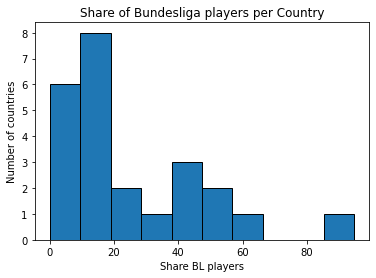

In [59]:
# check normal distribution
from scipy import stats
import matplotlib.pyplot as plt

# histogramm
plt.hist(df_per_country['perc_Bundesliga'], bins=10, edgecolor='black')
plt.title('Share of Bundesliga players per Country')
plt.xlabel('Share BL players')
plt.ylabel('Number of countries')
plt.show()

In [60]:
from scipy.stats import spearmanr

# Merge Level mit df_per_country
df_per_country = pd.merge(df_per_country, Level, on='Country')

# Berechnung von Spearman's Rho
rho, p_value = spearmanr(df_per_country['perc_Bundesliga'], df_per_country['Level'])

print("Spearman's Rho:", rho)
print("p-Wert:", p_value)


Spearman's Rho: 0.4377455783302735
p-Wert: 0.032409684378846476


In [61]:
from scipy.stats import kendalltau

# Kendall's Tau
tau, p_value = kendalltau(df_per_country['perc_Bundesliga'], df_per_country['Level'])

print("Kendall's Tau:", tau)
print("p-Wert:", p_value)

Kendall's Tau: 0.37789786892313915
p-Wert: 0.0233428424270265
